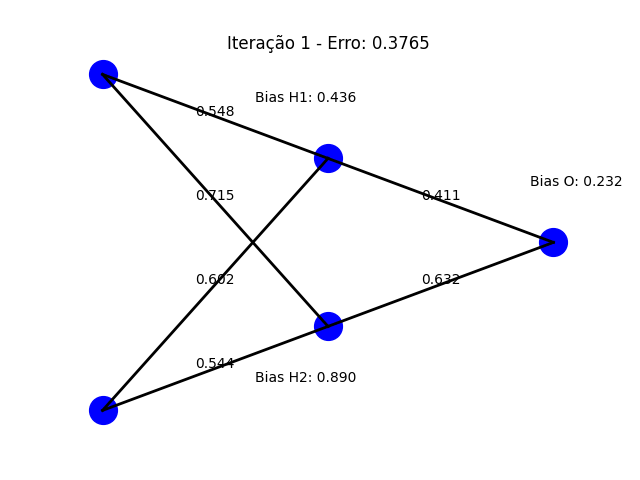

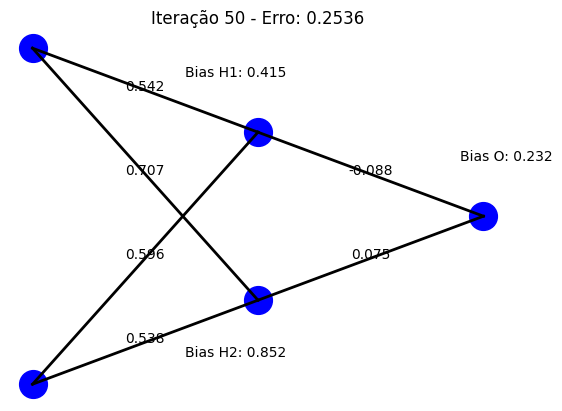

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# Configurações iniciais para a rede
np.random.seed(0)
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Entradas de um perceptron
target = np.array([[0], [1], [1], [0]])  # Saída alvo para uma porta XOR (dimensão ajustada para compatibilidade)

# Inicialização dos pesos e bias para uma rede de 2-2-1
weights_input_hidden = np.random.rand(2, 2)  # Pesos entre a camada de entrada e a camada oculta
weights_hidden_output = np.random.rand(2, 1)  # Pesos entre a camada oculta e a camada de saída
bias_hidden = np.random.rand(2)  # Bias para cada neurônio na camada oculta
bias_output = np.random.rand(1)  # Bias para o neurônio de saída
learning_rate = 0.1

# Função de ativação sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada da função sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass da rede neural
def forward(inputs):
    hidden_layer_input = np.dot(inputs, weights_input_hidden) + bias_hidden  # Camada oculta
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output  # Camada de saída
    output = sigmoid(output_layer_input)
    return hidden_layer_output, output

# Treinamento e armazenamento dos pesos para a animação
weight_input_hidden_history = []
weight_hidden_output_history = []
bias_hidden_history = []
bias_output_history = []
loss_history = []

for epoch in range(50):  # 50 iterações de treinamento para visualização
    # Forward pass
    hidden_output, outputs = forward(input_data)
    
    # Calcula o erro (MSE)
    error = target - outputs
    loss = np.mean(error ** 2)
    loss_history.append(loss)
    
    # Backpropagation para saída
    d_output = error * sigmoid_derivative(outputs)
    weights_hidden_output += learning_rate * np.dot(hidden_output.T, d_output)
    bias_output += learning_rate * np.sum(d_output, axis=0)
    
    # Backpropagation para camada oculta
    d_hidden = np.dot(d_output, weights_hidden_output.T) * sigmoid_derivative(hidden_output)
    weights_input_hidden += learning_rate * np.dot(input_data.T, d_hidden)
    bias_hidden += learning_rate * np.sum(d_hidden, axis=0)
    
    # Armazenar os pesos e bias para animação
    weight_input_hidden_history.append(weights_input_hidden.copy())
    weight_hidden_output_history.append(weights_hidden_output.copy())
    bias_hidden_history.append(bias_hidden.copy())
    bias_output_history.append(bias_output)

# Preparando a animação da rede neural
fig, ax = plt.subplots()
ax.axis("off")  # Ocultar os eixos

# Desenhando os neurônios (círculos) para entrada, oculta e saída
neurons = {"input_1": (-1, 0.6), "input_2": (-1, -0.6),
           "hidden_1": (0, 0.3), "hidden_2": (0, -0.3),
           "output": (1, 0)}

for neuron, pos in neurons.items():
    ax.plot(*pos, 'o', markersize=20, color="blue")  # Removemos os rótulos de texto dos neurônios

# Conexões e rótulos de peso
lines = {}  # Armazenar as linhas de conexão para animação
weight_texts = {}  # Armazenar os rótulos de peso para animação

# Conexões da camada de entrada para a camada oculta
for i, (input_neuron, hidden_neuron) in enumerate([("input_1", "hidden_1"), ("input_1", "hidden_2"),
                                                  ("input_2", "hidden_1"), ("input_2", "hidden_2")]):
    lines[f"line_{input_neuron}_{hidden_neuron}"], = ax.plot(
        [neurons[input_neuron][0], neurons[hidden_neuron][0]],
        [neurons[input_neuron][1], neurons[hidden_neuron][1]], 'k-', lw=2)
    weight_texts[f"weight_{input_neuron}_{hidden_neuron}"] = ax.text(
        -0.5, (neurons[input_neuron][1] + neurons[hidden_neuron][1]) / 2, '', ha='center', color="black", fontsize=10)

# Conexões da camada oculta para a camada de saída
for i, hidden_neuron in enumerate(["hidden_1", "hidden_2"]):
    lines[f"line_{hidden_neuron}_output"], = ax.plot(
        [neurons[hidden_neuron][0], neurons["output"][0]],
        [neurons[hidden_neuron][1], neurons["output"][1]], 'k-', lw=2)
    weight_texts[f"weight_{hidden_neuron}_output"] = ax.text(
        0.5, (neurons[hidden_neuron][1] + neurons["output"][1]) / 2, '', ha='center', color="black", fontsize=10)

# Bias texts
bias_text_hidden1 = ax.text(-0.1, 0.5, '', ha='center', color="black", fontsize=10)
bias_text_hidden2 = ax.text(-0.1, -0.5, '', ha='center', color="black", fontsize=10)
bias_text_output = ax.text(1.1, 0.2, '', ha='center', color="black", fontsize=10)

# Função de animação
def animate(i):
    # Atualiza os rótulos dos pesos entre entrada e camada oculta
    weight_texts["weight_input_1_hidden_1"].set_text(f'{weight_input_hidden_history[i][0,0]:.3f}')
    weight_texts["weight_input_1_hidden_2"].set_text(f'{weight_input_hidden_history[i][0,1]:.3f}')
    weight_texts["weight_input_2_hidden_1"].set_text(f'{weight_input_hidden_history[i][1,0]:.3f}')
    weight_texts["weight_input_2_hidden_2"].set_text(f'{weight_input_hidden_history[i][1,1]:.3f}')
    
    # Atualiza os rótulos dos pesos entre camada oculta e saída
    weight_texts["weight_hidden_1_output"].set_text(f'{weight_hidden_output_history[i][0,0]:.3f}')
    weight_texts["weight_hidden_2_output"].set_text(f'{weight_hidden_output_history[i][1,0]:.3f}')
    
    # Atualiza os rótulos de bias
    bias_text_hidden1.set_text(f'Bias H1: {bias_hidden_history[i][0]:.3f}')
    bias_text_hidden2.set_text(f'Bias H2: {bias_hidden_history[i][1]:.3f}')
    bias_text_output.set_text(f'Bias O: {bias_output_history[i][0]:.3f}')
    
    ax.set_title(f'Iteração {i + 1} - Erro: {loss_history[i]:.4f}')
    return list(lines.values()) + list(weight_texts.values()) + [bias_text_hidden1, bias_text_hidden2, bias_text_output]

# Criando a animação
anim = FuncAnimation(fig, animate, frames=len(weight_input_hidden_history), interval=300, blit=True)

# Salvando a animação como GIF usando Pillow
anim.save("neural_network_hidden_layer_weight_update.gif", writer="pillow")

# Exibindo o GIF no Jupyter Notebook
display(Image(filename="neural_network_hidden_layer_weight_update.gif"))


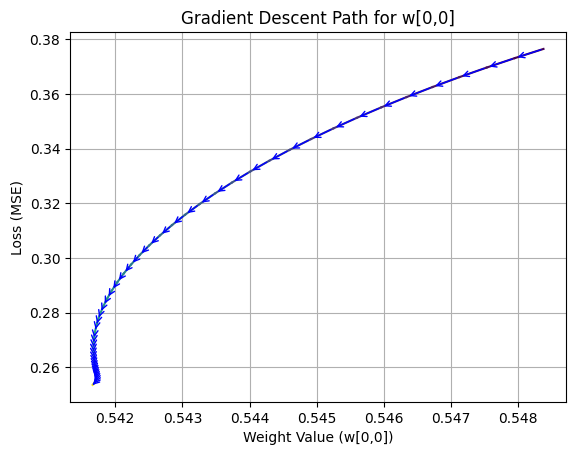

In [7]:
# Extract the trajectory of a specific weight and corresponding loss
tracked_weight = [w[0, 0] for w in weight_input_hidden_history]  # You can change this index to another weight
loss_vals = loss_history

# Create a 2D plot of the weight trajectory
from matplotlib import cm

colors = cm.viridis(np.linspace(0, 1, len(tracked_weight)))
fig, ax = plt.subplots()
for i in range(len(tracked_weight)-1):
    ax.plot(tracked_weight[i:i+2], loss_vals[i:i+2], color=colors[i])
for i in range(len(tracked_weight)-1):
    ax.annotate('', xy=(tracked_weight[i+1], loss_vals[i+1]), xytext=(tracked_weight[i], loss_vals[i]),
                arrowprops=dict(arrowstyle='->', color='blue', lw=1))

ax.set_xlabel('Weight Value (w[0,0])')
ax.set_ylabel('Loss (MSE)')
ax.set_title('Gradient Descent Path for w[0,0]')
plt.grid(True)
plt.show()


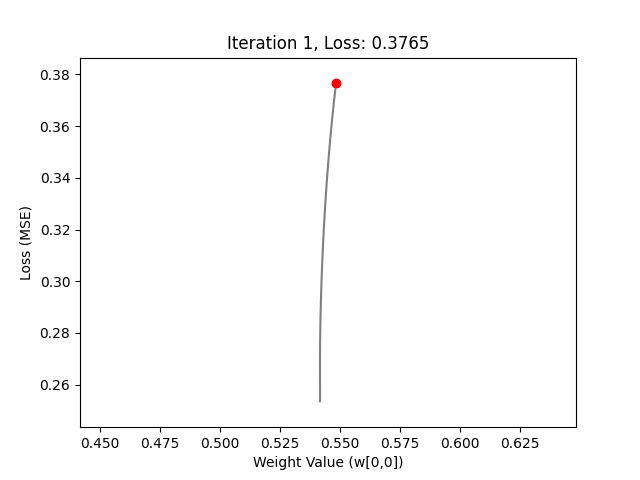

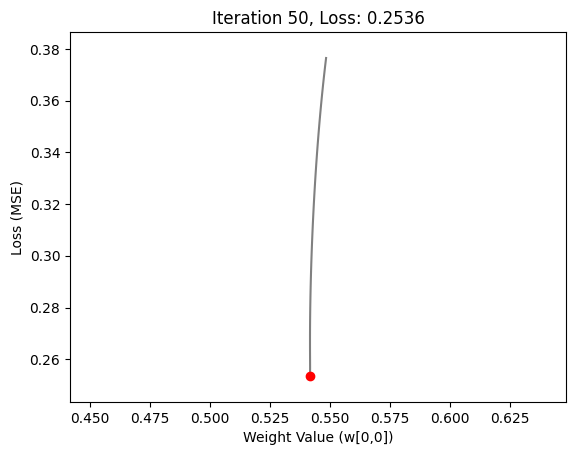

In [8]:
fig3, ax3 = plt.subplots()
ax3.set_xlim(min(tracked_weight) - 0.1, max(tracked_weight) + 0.1)
ax3.set_ylim(min(loss_vals) - 0.01, max(loss_vals) + 0.01)
ax3.set_xlabel('Weight Value (w[0,0])')
ax3.set_ylabel('Loss (MSE)')
ax3.set_title('Gradient Descent Animation')
line, = ax3.plot(tracked_weight, loss_vals, '-', color='gray')
dot, = ax3.plot([], [], 'ro')  # Moving dot
def animate_descent(i):
    dot.set_data([tracked_weight[i]], [loss_vals[i]])  # Wrap in lists
    ax3.set_title(f'Iteration {i+1}, Loss: {loss_vals[i]:.4f}')
    return (dot,)  # Must return a tuple of artists

anim2 = FuncAnimation(fig3, animate_descent, frames=len(tracked_weight), interval=300, blit=True)
anim2.save("gradient_descent_path.gif", writer="pillow")

# Display in notebook
display(Image(filename="gradient_descent_path.gif"))


# Weight Evolution

Epoch 000 | Loss: 228.5077
Epoch 010 | Loss: 103.9122
Epoch 020 | Loss: 133.3482
Epoch 030 | Loss: 37.6562
Epoch 040 | Loss: 4.9576
Epoch 050 | Loss: 28.2064
Epoch 060 | Loss: 1.0355
Epoch 070 | Loss: 6.9128
Epoch 080 | Loss: 2.9754
Epoch 090 | Loss: 4.2281


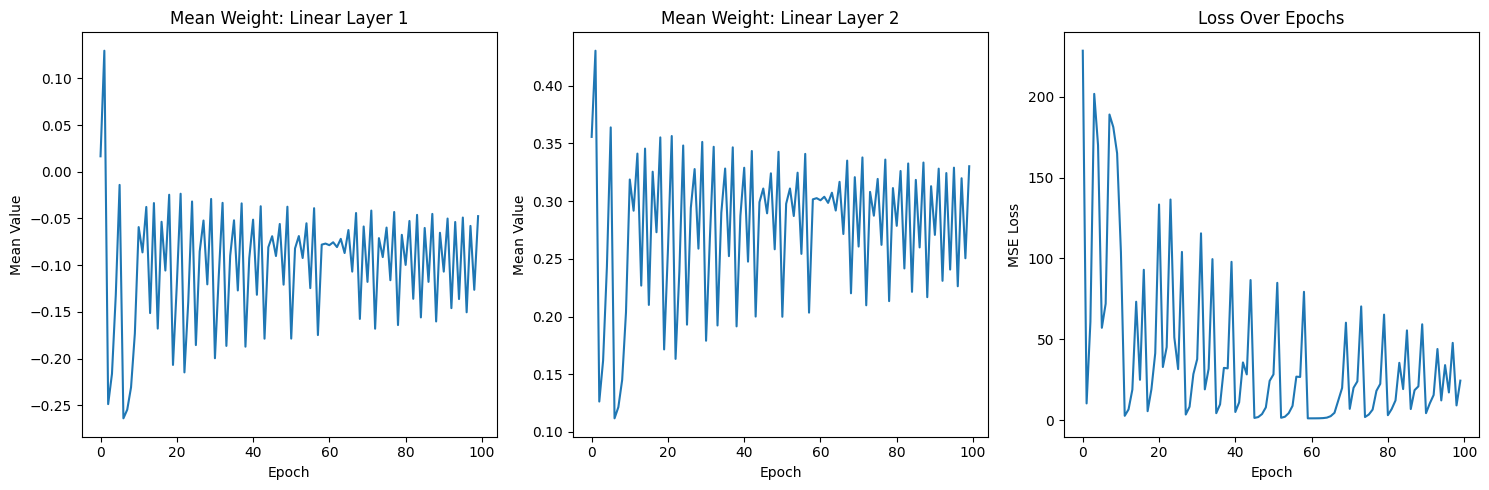

In [11]:
# Imports and setup
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate synthetic data
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)

x_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Store mean weights over time
weight_history = {
    'linear1.mean_weight': [],
    'linear2.mean_weight': []
}
loss_history = []

# Training loop with weight tracking
epochs = 100

for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record mean weight values from each layer
    with torch.no_grad():
        w1_mean = model.linear1.weight.mean().item()
        w2_mean = model.linear2.weight.mean().item()
        weight_history['linear1.mean_weight'].append(w1_mean)
        weight_history['linear2.mean_weight'].append(w2_mean)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f}")

# Plot mean weight evolution and loss
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Mean Weight: Linear Layer 1")
plt.plot(weight_history['linear1.mean_weight'])
plt.xlabel("Epoch")
plt.ylabel("Mean Value")

plt.subplot(1, 3, 2)
plt.title("Mean Weight: Linear Layer 2")
plt.plot(weight_history['linear2.mean_weight'])
plt.xlabel("Epoch")
plt.ylabel("Mean Value")

plt.subplot(1, 3, 3)
plt.title("Loss Over Epochs")
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

plt.tight_layout()
plt.show()


Epoch 000 | Loss: 228.5077
Epoch 010 | Loss: 174.9929
Epoch 020 | Loss: 123.1590
Epoch 030 | Loss: 72.8285
Epoch 040 | Loss: 30.7471
Epoch 050 | Loss: 6.5921
Epoch 060 | Loss: 1.4848
Epoch 070 | Loss: 2.4259
Epoch 080 | Loss: 1.8115
Epoch 090 | Loss: 1.4051


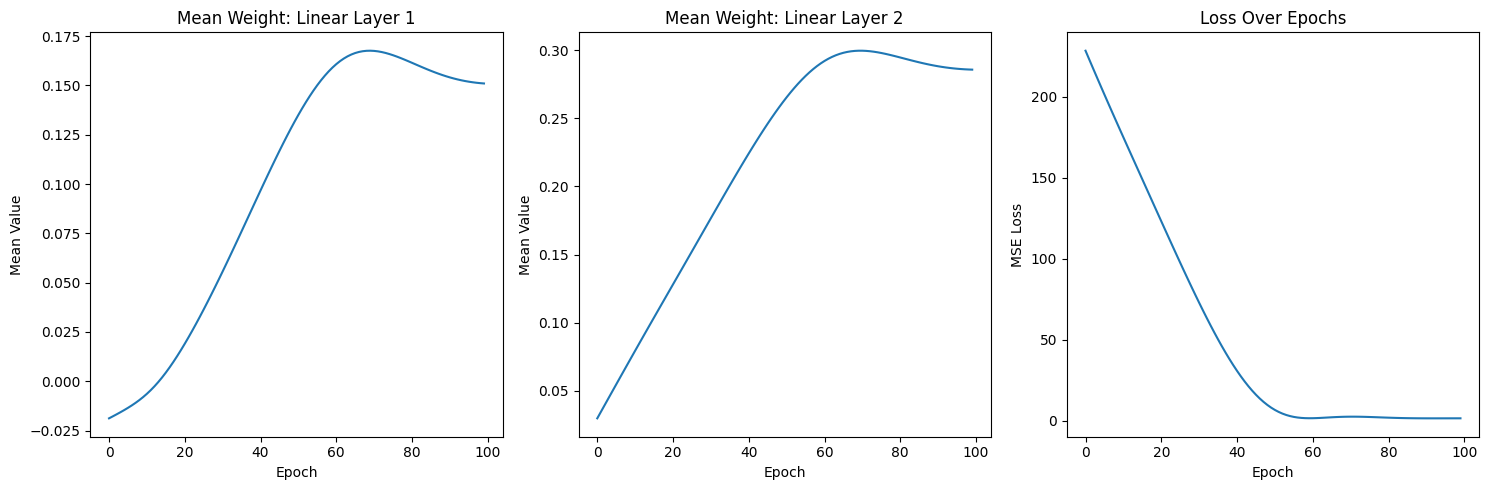

In [12]:
# Imports and setup
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate synthetic data
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)

x_train = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Store mean weights over time
weight_history = {
    'linear1.mean_weight': [],
    'linear2.mean_weight': []
}
loss_history = []

# Training loop with weight tracking
epochs = 100

for epoch in range(epochs):
    model.train()

    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    loss_history.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record mean weight values from each layer
    with torch.no_grad():
        w1_mean = model.linear1.weight.mean().item()
        w2_mean = model.linear2.weight.mean().item()
        weight_history['linear1.mean_weight'].append(w1_mean)
        weight_history['linear2.mean_weight'].append(w2_mean)

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.item():.4f}")

# Plot mean weight evolution and loss
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Mean Weight: Linear Layer 1")
plt.plot(weight_history['linear1.mean_weight'])
plt.xlabel("Epoch")
plt.ylabel("Mean Value")

plt.subplot(1, 3, 2)
plt.title("Mean Weight: Linear Layer 2")
plt.plot(weight_history['linear2.mean_weight'])
plt.xlabel("Epoch")
plt.ylabel("Mean Value")

plt.subplot(1, 3, 3)
plt.title("Loss Over Epochs")
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

plt.tight_layout()
plt.show()

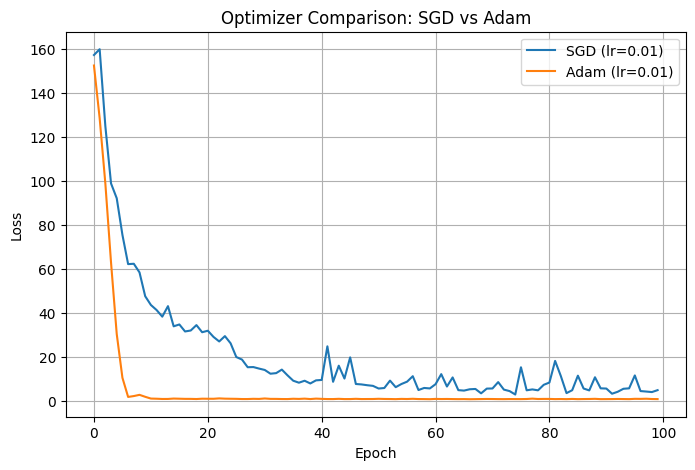

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate dataset
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
dataset = TensorDataset(x_tensor, y_tensor)

# Model factory
def get_model():
    return nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

# Train function
def train(model, dataloader, optimizer, loss_fn, epochs):
    loss_history = []
    for epoch in range(epochs):
        total_loss = 0
        for xb, yb in dataloader:
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
        loss_history.append(total_loss / len(dataloader))
    return loss_history

# Settings
epochs = 100
batch_size = 16
loss_fn = nn.MSELoss()
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# SGD
model_sgd = get_model()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
loss_sgd = train(model_sgd, loader, optimizer_sgd, loss_fn, epochs)

# Adam
model_adam = get_model()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=0.01)
loss_adam = train(model_adam, loader, optimizer_adam, loss_fn, epochs)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(loss_sgd, label='SGD (lr=0.01)')
plt.plot(loss_adam, label='Adam (lr=0.01)')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Optimizer Comparison: SGD vs Adam")
plt.legend()
plt.grid(True)
plt.show()


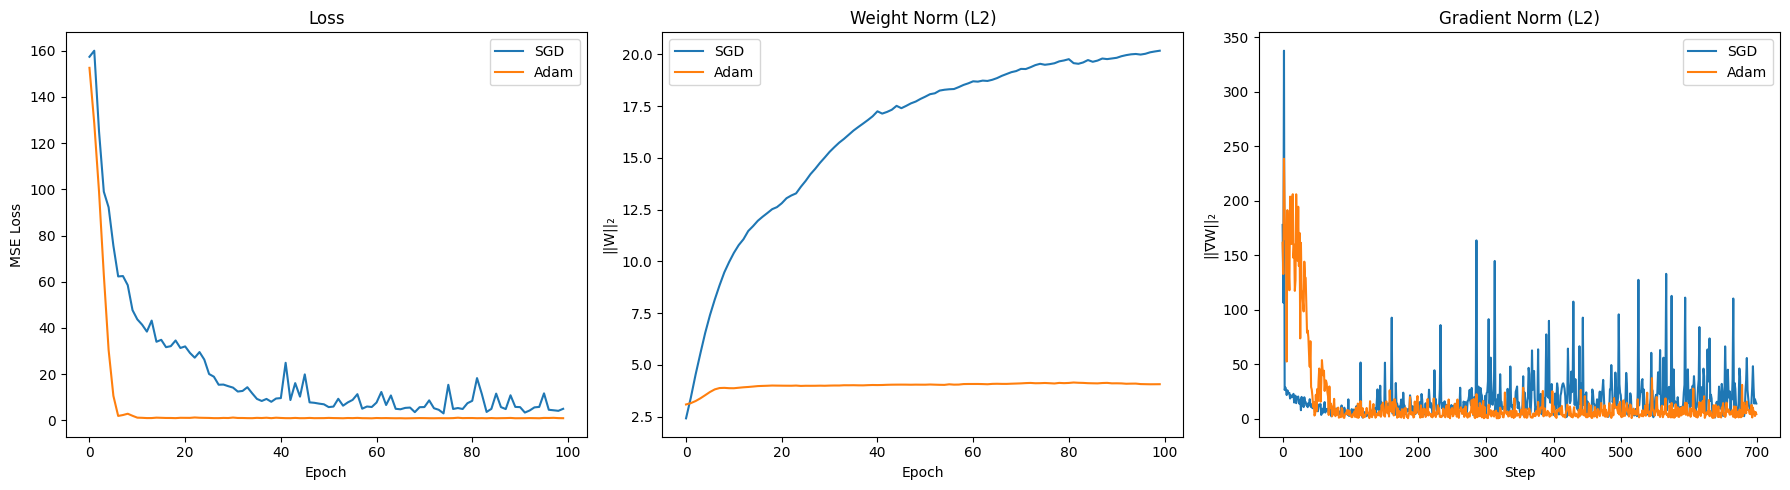

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Data
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
dataset = TensorDataset(x_tensor, y_tensor)

# Model factory
def get_model():
    return nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

# Norm utilities
def compute_weight_norm(model):
    return torch.sqrt(sum(torch.sum(p ** 2) for p in model.parameters() if p.requires_grad)).item()

def compute_grad_norm(model):
    return torch.sqrt(sum(torch.sum(p.grad ** 2) for p in model.parameters() if p.grad is not None)).item()

# Training function with norm tracking
def train_with_norms(model, dataloader, optimizer, loss_fn, epochs):
    loss_history = []
    weight_norms = []
    grad_norms = []

    for epoch in range(epochs):
        total_loss = 0
        for xb, yb in dataloader:
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()

            # Compute gradient norm before optimizer step
            grad_norms.append(compute_grad_norm(model))

            optimizer.step()

            total_loss += loss.item()

        loss_history.append(total_loss / len(dataloader))
        weight_norms.append(compute_weight_norm(model))

    return loss_history, weight_norms, grad_norms

# Settings
epochs = 100
batch_size = 16
lr = 0.01
loss_fn = nn.MSELoss()
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# --- SGD ---
model_sgd = get_model()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=lr)
loss_sgd, weight_norms_sgd, grad_norms_sgd = train_with_norms(model_sgd, loader, optimizer_sgd, loss_fn, epochs)

# --- Adam ---
model_adam = get_model()
optimizer_adam = optim.Adam(model_adam.parameters(), lr=lr)
loss_adam, weight_norms_adam, grad_norms_adam = train_with_norms(model_adam, loader, optimizer_adam, loss_fn, epochs)

# Plot all comparisons
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(loss_sgd, label='SGD')
axs[0].plot(loss_adam, label='Adam')
axs[0].set_title("Loss")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("MSE Loss")
axs[0].legend()

axs[1].plot(weight_norms_sgd, label='SGD')
axs[1].plot(weight_norms_adam, label='Adam')
axs[1].set_title("Weight Norm (L2)")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("||W||₂")
axs[1].legend()

axs[2].plot(grad_norms_sgd, label='SGD')
axs[2].plot(grad_norms_adam, label='Adam')
axs[2].set_title("Gradient Norm (L2)")
axs[2].set_xlabel("Step")
axs[2].set_ylabel("||∇W||₂")
axs[2].legend()

plt.tight_layout()
plt.show()


# 🧠 Optimizer Comparison: **SGD** vs **Adam**

When training neural networks, **optimizers** are used to update weights based on the computed gradients. Two commonly used optimizers are:

- **Stochastic Gradient Descent (SGD)**
- **Adam (Adaptive Moment Estimation)**

Your experiment compares both on a simple regression problem (`y = 2x + 3 + noise`). Here's how each works:

---

## 🔁 Stochastic Gradient Descent (SGD)

**SGD** updates weights using the gradient of the loss with respect to each parameter. It's a straightforward method but can suffer from slow convergence and instability in certain scenarios.

### **SGD Update Rule**
Given a learning rate $\eta$, parameter $\theta$, and gradient $g_t = \nabla_\theta L(\theta_t)$, the update is:

$$
\theta_{t+1} = \theta_t - \eta \cdot g_t
$$

- $\eta$: learning rate
- $g_t$: gradient of the loss at step $t$

> 📌 In your code:
```python
optimizer = optim.SGD(model.parameters(), lr=0.01)
```

---

## ⚡ Adam Optimizer (Adaptive Moment Estimation)

**Adam** combines the benefits of both:
- **Momentum** (to smooth updates)
- **RMSprop** (to adapt learning rates per parameter)

It keeps **exponentially decaying averages** of past gradients and their squares.

### **Adam Update Rules**

1. **Gradient**:  
$$
g_t = \nabla_\theta L(\theta_t)
$$

2. **First moment (mean of gradients)**:  
$$
m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t
$$

3. **Second moment (uncentered variance)**:  
$$
v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2
$$

4. **Bias correction** (since $m_t$ and $v_t$ are initialized at 0):  
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

5. **Parameter update**:  
$$
\theta_{t+1} = \theta_t - \eta \cdot \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon}
$$

> Common defaults:
- $\beta_1 = 0.9$
- $\beta_2 = 0.999$
- $\epsilon = 10^{-8}$

> 📌 In your code:
```python
optimizer = optim.Adam(model.parameters(), lr=0.01)
```

---

## 📉 Experimental Results

The plot below (from your code) shows a **loss comparison over epochs**:

- **Adam** usually converges **faster** and more **smoothly**, thanks to adaptive learning rates.
- **SGD** may take longer and may fluctuate more, especially with noisy gradients.

![SGD vs Adam Plot](attachment:image.png) ← (insert actual plot if in notebook)

---

## 🏁 Summary

| Optimizer | Strengths | Weaknesses |
|----------|-----------|------------|
| **SGD** | Simple, memory-efficient | Slower convergence, sensitive to learning rate |
| **Adam** | Fast convergence, adaptive learning | Slightly more computation/memory, can overfit on small datasets |

# Batch, Mini-Batch, SGD

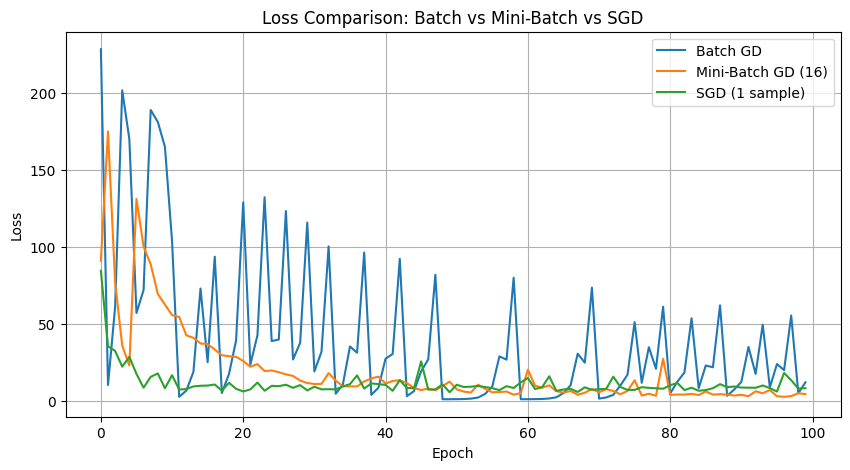

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset

# Reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Dataset
x = np.linspace(0, 10, 100)
y = 2 * x + 3 + np.random.normal(0, 1, size=x.shape)
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
dataset = TensorDataset(x_tensor, y_tensor)

# Neural network model
def get_model():
    return nn.Sequential(
        nn.Linear(1, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )

# Training function
def train(model, dataloader, optimizer, loss_fn, epochs):
    loss_history = []
    for epoch in range(epochs):
        epoch_loss = 0
        for xb, yb in dataloader:
            pred = model(xb)
            loss = loss_fn(pred, yb)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
        loss_history.append(epoch_loss / len(dataloader))
    return loss_history

# Settings
epochs = 100
loss_fn = nn.MSELoss()

# --- 1. Batch Gradient Descent (full batch) ---
batch_loader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)
model_batch = get_model()
optimizer_batch = optim.SGD(model_batch.parameters(), lr=0.01)
loss_batch = train(model_batch, batch_loader, optimizer_batch, loss_fn, epochs)

# --- 2. Mini-Batch Gradient Descent ---
mini_loader = DataLoader(dataset, batch_size=16, shuffle=True)
model_mini = get_model()
optimizer_mini = optim.SGD(model_mini.parameters(), lr=0.01)
loss_mini = train(model_mini, mini_loader, optimizer_mini, loss_fn, epochs)

# --- 3. Stochastic Gradient Descent (1 sample per update) ---
sgd_loader = DataLoader(dataset, batch_size=1, shuffle=True)
model_sgd = get_model()
optimizer_sgd = optim.SGD(model_sgd.parameters(), lr=0.01)
loss_sgd = train(model_sgd, sgd_loader, optimizer_sgd, loss_fn, epochs)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(loss_batch, label='Batch GD')
plt.plot(loss_mini, label='Mini-Batch GD (16)')
plt.plot(loss_sgd, label='SGD (1 sample)')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison: Batch vs Mini-Batch vs SGD")
plt.legend()
plt.grid(True)
plt.show()

# Dropout

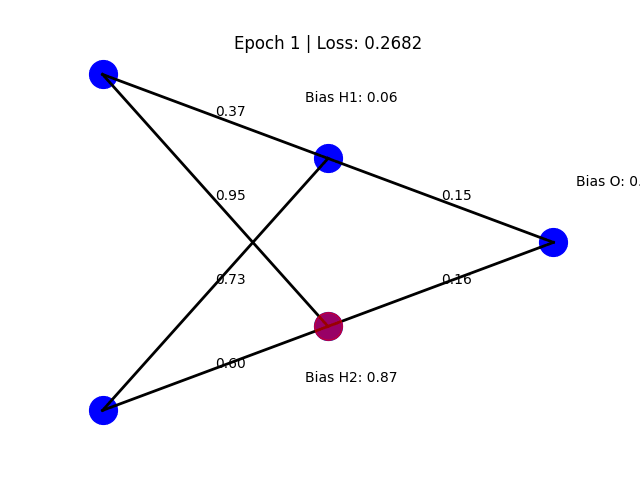

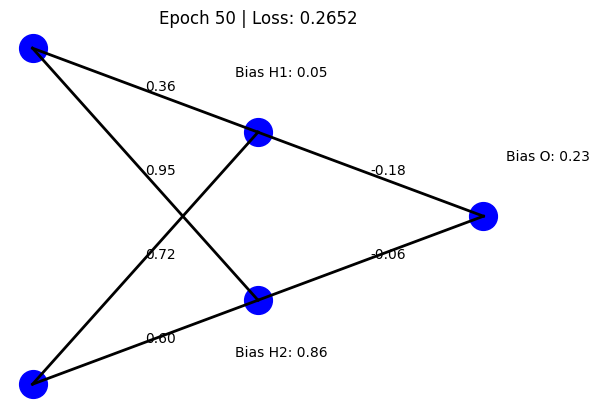

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Image, display

# XOR input and target
np.random.seed(42)
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target = np.array([[0], [1], [1], [0]])

# Initialize weights and biases for a 2-2-1 net
weights_input_hidden = np.random.rand(2, 2)
weights_hidden_output = np.random.rand(2, 1)
bias_hidden = np.random.rand(2)
bias_output = np.random.rand(1)
learning_rate = 0.1
dropout_rate = 0.5  # Apply dropout on hidden neurons

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Forward pass with dropout
def forward(inputs):
    z_hidden = np.dot(inputs, weights_input_hidden) + bias_hidden
    a_hidden = sigmoid(z_hidden)
    
    # Dropout mask and application
    mask = (np.random.rand(*a_hidden.shape) > dropout_rate).astype(float)
    a_hidden *= mask
    a_hidden /= (1.0 - dropout_rate)  # scale during training
    
    z_output = np.dot(a_hidden, weights_hidden_output) + bias_output
    output = sigmoid(z_output)
    return a_hidden, output, mask

# Histories for animation
weight_input_hidden_history = []
weight_hidden_output_history = []
bias_hidden_history = []
bias_output_history = []
loss_history = []
dropout_mask_history = []

# Train and record
for epoch in range(50):
    a_hidden, output, dropout_mask = forward(input_data)
    error = target - output
    loss = np.mean(error ** 2)
    
    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    weights_hidden_output += learning_rate * np.dot(a_hidden.T, d_output)
    bias_output += learning_rate * np.sum(d_output, axis=0)

    d_hidden = np.dot(d_output, weights_hidden_output.T) * sigmoid_derivative(a_hidden)
    weights_input_hidden += learning_rate * np.dot(input_data.T, d_hidden)
    bias_hidden += learning_rate * np.sum(d_hidden, axis=0)

    # Record
    weight_input_hidden_history.append(weights_input_hidden.copy())
    weight_hidden_output_history.append(weights_hidden_output.copy())
    bias_hidden_history.append(bias_hidden.copy())
    bias_output_history.append(bias_output.copy())
    loss_history.append(loss)
    dropout_mask_history.append(dropout_mask[0].copy())  # only one sample shown in animation

# Setup animation plot
fig, ax = plt.subplots()
ax.axis("off")

neurons = {"input_1": (-1, 0.6), "input_2": (-1, -0.6),
           "hidden_1": (0, 0.3), "hidden_2": (0, -0.3),
           "output": (1, 0)}

for neuron, pos in neurons.items():
    ax.plot(*pos, 'o', markersize=20, color="blue")

# Lines (static)
lines = {}
weight_texts = {}

for input_neuron, hidden_neuron in [("input_1", "hidden_1"), ("input_1", "hidden_2"),
                                    ("input_2", "hidden_1"), ("input_2", "hidden_2")]:
    lines[f"{input_neuron}_{hidden_neuron}"], = ax.plot(
        [neurons[input_neuron][0], neurons[hidden_neuron][0]],
        [neurons[input_neuron][1], neurons[hidden_neuron][1]], 'k-', lw=2)
    weight_texts[f"{input_neuron}_{hidden_neuron}"] = ax.text(
        -0.5, (neurons[input_neuron][1] + neurons[hidden_neuron][1]) / 2, '', fontsize=10)

for hidden_neuron in ["hidden_1", "hidden_2"]:
    lines[f"{hidden_neuron}_output"], = ax.plot(
        [neurons[hidden_neuron][0], neurons["output"][0]],
        [neurons[hidden_neuron][1], neurons["output"][1]], 'k-', lw=2)
    weight_texts[f"{hidden_neuron}_output"] = ax.text(
        0.5, (neurons[hidden_neuron][1] + neurons["output"][1]) / 2, '', fontsize=10)

# Dropout mask indicators
highlight_hidden1 = ax.plot(*neurons["hidden_1"], 'o', markersize=20, color="red", alpha=0)[0]
highlight_hidden2 = ax.plot(*neurons["hidden_2"], 'o', markersize=20, color="red", alpha=0)[0]

# Bias texts
bias_text_hidden1 = ax.text(-0.1, 0.5, '', fontsize=10)
bias_text_hidden2 = ax.text(-0.1, -0.5, '', fontsize=10)
bias_text_output = ax.text(1.1, 0.2, '', fontsize=10)

def animate(i):
    # Update weight labels
    w = weight_input_hidden_history[i]
    weight_texts["input_1_hidden_1"].set_text(f"{w[0,0]:.2f}")
    weight_texts["input_1_hidden_2"].set_text(f"{w[0,1]:.2f}")
    weight_texts["input_2_hidden_1"].set_text(f"{w[1,0]:.2f}")
    weight_texts["input_2_hidden_2"].set_text(f"{w[1,1]:.2f}")
    
    w_out = weight_hidden_output_history[i]
    weight_texts["hidden_1_output"].set_text(f"{w_out[0,0]:.2f}")
    weight_texts["hidden_2_output"].set_text(f"{w_out[1,0]:.2f}")

    # Update bias labels
    bias_text_hidden1.set_text(f'Bias H1: {bias_hidden_history[i][0]:.2f}')
    bias_text_hidden2.set_text(f'Bias H2: {bias_hidden_history[i][1]:.2f}')
    bias_text_output.set_text(f'Bias O: {bias_output_history[i][0]:.2f}')
    
    # Dropout visualization
    mask = dropout_mask_history[i]
    highlight_hidden1.set_alpha(0 if mask[0] == 1 else 0.6)
    highlight_hidden2.set_alpha(0 if mask[1] == 1 else 0.6)

    ax.set_title(f"Epoch {i+1} | Loss: {loss_history[i]:.4f}")
    return list(lines.values()) + list(weight_texts.values()) + \
           [bias_text_hidden1, bias_text_hidden2, bias_text_output, highlight_hidden1, highlight_hidden2]

# Animate and save
anim = FuncAnimation(fig, animate, frames=len(weight_input_hidden_history), interval=300, blit=True)
anim.save("dropout_visualization.gif", writer="pillow")
display(Image(filename="dropout_visualization.gif"))


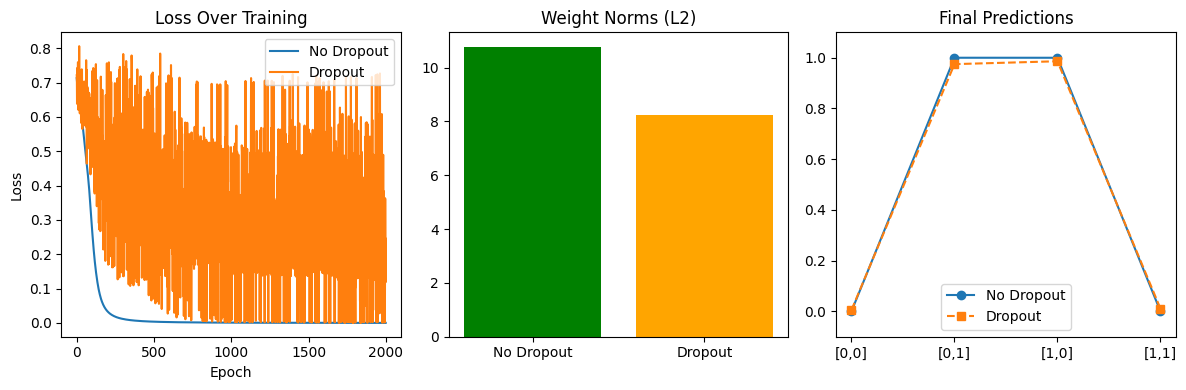

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# XOR dataset
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

# Network definition
class XORNet(nn.Module):
    def __init__(self, dropout=False):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Dropout(p=0.5) if dropout else nn.Identity(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training function
def train(model, X, y, epochs=2000):
    loss_fn = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    loss_log = []

    for _ in range(epochs):
        model.train()
        out = model(X)
        loss = loss_fn(out, y)
        loss_log.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return loss_log

# Instantiate and train both networks
model_no_dropout = XORNet(dropout=False)
model_with_dropout = XORNet(dropout=True)

loss_no_dropout = train(model_no_dropout, X, y)
loss_with_dropout = train(model_with_dropout, X, y)

# Evaluate final predictions
model_no_dropout.eval()
model_with_dropout.eval()
pred_no_dropout = model_no_dropout(X).detach()
pred_with_dropout = model_with_dropout(X).detach()

# Weight norm comparison
def get_weight_norm(model):
    return np.sqrt(sum((p.norm().item())**2 for p in model.parameters() if p.requires_grad))

norm_no_dropout = get_weight_norm(model_no_dropout)
norm_with_dropout = get_weight_norm(model_with_dropout)

# Final loss
final_loss_no = loss_no_dropout[-1]
final_loss_drop = loss_with_dropout[-1]

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(loss_no_dropout, label='No Dropout')
plt.plot(loss_with_dropout, label='Dropout')
plt.title("Loss Over Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 3, 2)
plt.bar(["No Dropout", "Dropout"], [norm_no_dropout, norm_with_dropout], color=["green", "orange"])
plt.title("Weight Norms (L2)")

plt.subplot(1, 3, 3)
plt.plot(pred_no_dropout.numpy(), 'o-', label='No Dropout')
plt.plot(pred_with_dropout.numpy(), 's--', label='Dropout')
plt.xticks(range(4), ['[0,0]', '[0,1]', '[1,0]', '[1,1]'])
plt.ylim(-0.1, 1.1)
plt.title("Final Predictions")
plt.legend()

plt.tight_layout()
plt.show()


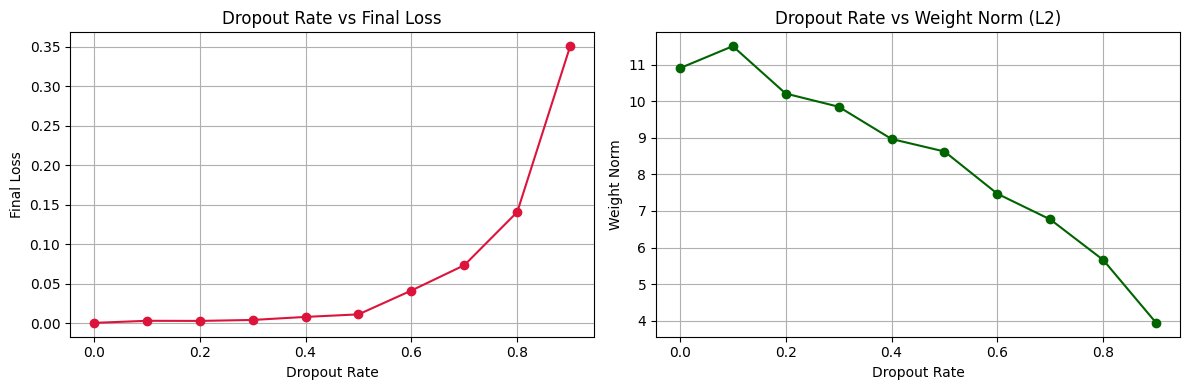

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# XOR Dataset
X = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

# Network definition
class XORNet(nn.Module):
    def __init__(self, dropout_rate):
        super().__init__()
        self.dropout_rate = dropout_rate
        self.model = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Training function
def train_model(model, X, y, epochs=2000):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    for _ in range(epochs):
        model.train()
        y_pred = model(X)
        loss = criterion(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    with torch.no_grad():
        final_loss = criterion(model(X), y).item()
        weight_norm = sum((p.norm().item())**2 for p in model.parameters()) ** 0.5
    return final_loss, weight_norm

# Dropout rate sweep
dropout_rates = np.arange(0.0, 1.0, 0.1)
final_losses = []
weight_norms = []

for rate in dropout_rates:
    torch.manual_seed(42)  # same seed for fair comparison
    model = XORNet(dropout_rate=rate)
    loss, norm = train_model(model, X, y)
    final_losses.append(loss)
    weight_norms.append(norm)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dropout_rates, final_losses, 'o-', color='crimson')
plt.title("Dropout Rate vs Final Loss")
plt.xlabel("Dropout Rate")
plt.ylabel("Final Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(dropout_rates, weight_norms, 'o-', color='darkgreen')
plt.title("Dropout Rate vs Weight Norm (L2)")
plt.xlabel("Dropout Rate")
plt.ylabel("Weight Norm")
plt.grid(True)

plt.tight_layout()
plt.show()


# Batch and Layer Norm

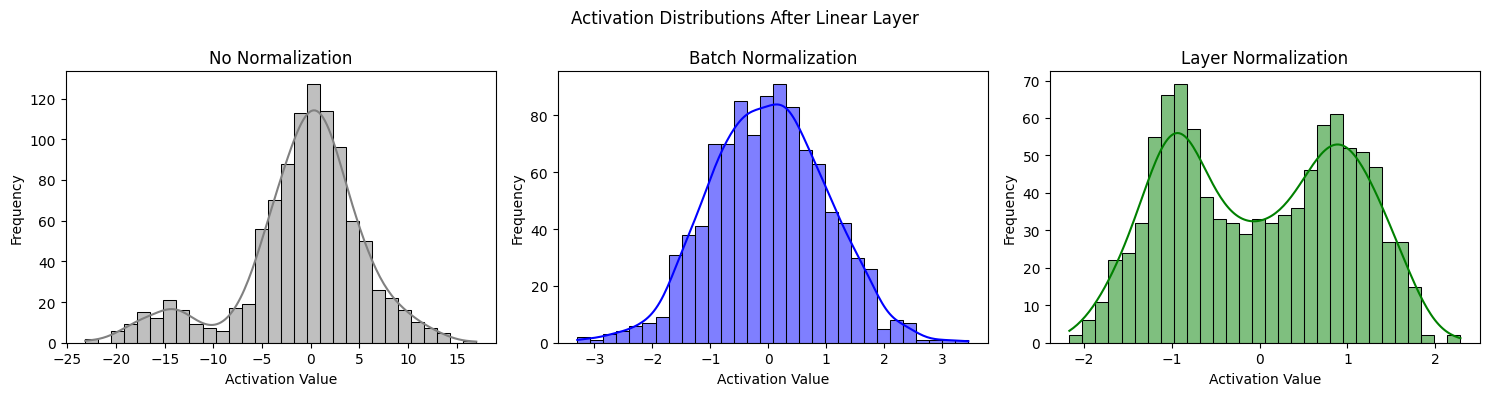

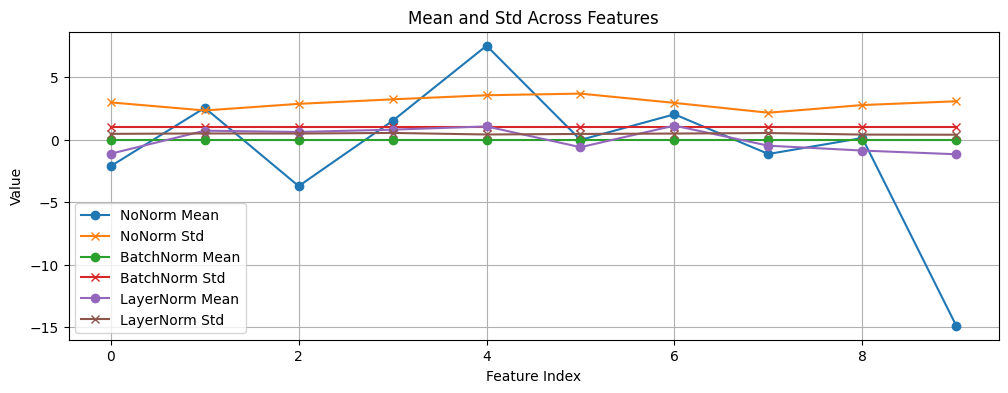

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Create synthetic data
torch.manual_seed(0)
x = torch.randn(100, 10) * 5 + 10  # highly non-normal data: mean ~10, std ~5

# Define three models: no norm, batch norm, layer norm
class NoNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 10)

    def forward(self, x):
        return self.linear(x)

class WithBatchNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 10)
        self.bn = nn.BatchNorm1d(10)

    def forward(self, x):
        return self.bn(self.linear(x))

class WithLayerNorm(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(10, 10)
        self.ln = nn.LayerNorm(10)

    def forward(self, x):
        return self.ln(self.linear(x))

# Instantiate models
model_raw = NoNorm()
model_bn = WithBatchNorm()
model_ln = WithLayerNorm()

# Forward pass
out_raw = model_raw(x)
out_bn = model_bn(x)
out_ln = model_ln(x)

# Convert to numpy
out_raw_np = out_raw.detach().numpy()
out_bn_np = out_bn.detach().numpy()
out_ln_np = out_ln.detach().numpy()

# Plot histograms of activations
def plot_activation_histograms():
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    sns.histplot(out_raw_np.flatten(), kde=True, ax=axs[0], bins=30, color="gray")
    axs[0].set_title("No Normalization")

    sns.histplot(out_bn_np.flatten(), kde=True, ax=axs[1], bins=30, color="blue")
    axs[1].set_title("Batch Normalization")

    sns.histplot(out_ln_np.flatten(), kde=True, ax=axs[2], bins=30, color="green")
    axs[2].set_title("Layer Normalization")

    for ax in axs:
        ax.set_xlabel("Activation Value")
        ax.set_ylabel("Frequency")
    plt.suptitle("Activation Distributions After Linear Layer")
    plt.tight_layout()
    plt.show()

# Plot mean and std per feature
def plot_feature_stats(tensors, labels):
    means = [t.mean(dim=0).detach().numpy() for t in tensors]
    stds = [t.std(dim=0).detach().numpy() for t in tensors]

    plt.figure(figsize=(12, 4))
    for i in range(3):
        plt.plot(means[i], label=f"{labels[i]} Mean", marker='o')
        plt.plot(stds[i], label=f"{labels[i]} Std", marker='x')
    plt.legend()
    plt.title("Mean and Std Across Features")
    plt.xlabel("Feature Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

# Run plots
plot_activation_histograms()
plot_feature_stats(
    [out_raw, out_bn, out_ln],
    ["NoNorm", "BatchNorm", "LayerNorm"]
)


### 🟥 Left: **No Normalization**

- **Highly skewed and spread out**
- Range: approximately **–20 to +15**
- Mean: centered **slightly left of zero**
- Std: very **large**, inconsistent across features

**Implication**:  
The output distribution reflects the randomness and scale of weights and input distribution. With no control, some neurons may saturate (especially for ReLU), leading to:
- **Vanishing gradients**
- **Unstable training**
- Need for small learning rates

---

### 🔵 Middle: **Batch Normalization**

- **Gaussian-like** shape
- Mean: very close to **0**
- Std: close to **1**
- Controlled, sharp, and feature-wise normalized

**Implication**:  
BatchNorm effectively **whitens each feature dimension across the batch**, resulting in:
- Well-scaled activations
- Faster convergence
- Reduced sensitivity to weight initialization

💡 But remember: this depends on batch statistics and may vary during inference (in `eval()` mode, it uses running averages).

---

### 🟢 Right: **Layer Normalization**

- Mean and std **per sample**, not per feature
- Distribution is **centered** and **compact**, but shape is different
- **Bimodal** shape in this case (depends on weight initialization)

**Implication**:  
LayerNorm **normalizes each input vector individually**, making it:
- **Batch-size agnostic**
- Ideal for **RNNs**, **Transformers**, and **online inference**
- More flexible when batches are small or variable

---

## 🔚 Summary: Visual Insights

| Feature           | NoNorm            | BatchNorm                          | LayerNorm                          |
|------------------|--------------------|------------------------------------|------------------------------------|
| Centered?        | ❌ (off-zero)       | ✅ (mean ≈ 0)                       | ✅ (mean ≈ 0 per sample)           |
| Std controlled?  | ❌ (very wide)      | ✅ (≈1 per feature)                 | ✅ (≈1 per sample)                 |
| Shape            | Irregular, skewed  | Smooth Gaussian                    | Bimodal or complex                |
| Normalizes...    | —                  | **Across batch, per feature**      | **Across features, per sample**   |


# ⚖️ BatchNorm vs LayerNorm: Why and How We Normalize

Neural networks often suffer from **unstable activations** and **internal covariate shift** — when the distribution of inputs to layers changes during training. This slows down learning and makes optimization harder.

**Normalization** techniques like **Batch Normalization (BN)** and **Layer Normalization (LN)** were introduced to **stabilize** and **accelerate** training by controlling the activation distributions.

---

## 🔧 Setup: Three Models for Comparison

You used synthetic input data $x \sim \mathcal{N}(10, 5)$, far from standard normal, and passed it through:

1. A **Linear Layer Only** (no normalization)
2. A **Linear Layer + BatchNorm**
3. A **Linear Layer + LayerNorm**

---

## 🎯 What Normalization Does

Normalization shifts and scales the activations:

$$
\text{Norm}(x) = \frac{x - \mu}{\sigma} \cdot \gamma + \beta
$$

Where:
- $\mu$ = mean
- $\sigma$ = standard deviation
- $\gamma, \beta$ = learnable parameters to scale and shift

---

## 🧪 Batch Normalization

```python
nn.BatchNorm1d(num_features)
```

### ✔️ How it works:
- Normalizes **each feature (column)** across the **batch dimension**.
- For each feature $j$:

$$
\mu_j = \frac{1}{B} \sum_{i=1}^B x_{ij}, \quad
\sigma_j^2 = \frac{1}{B} \sum_{i=1}^B (x_{ij} - \mu_j)^2
$$

- Applied as:

$$
\text{BN}(x_{ij}) = \gamma_j \cdot \frac{x_{ij} - \mu_j}{\sqrt{\sigma_j^2 + \epsilon}} + \beta_j
$$

### ✅ Pros:
- Very effective in **CNNs** and **large batch training**.
- Encourages **feature-wise consistency**.

### ❌ Cons:
- Depends on batch size.
- Fails or becomes unstable with small batches or variable-length sequences.

---

## 🧬 Layer Normalization

```python
nn.LayerNorm(normalized_shape)
```

### ✔️ How it works:
- Normalizes **across all features** for **each sample individually**.
- For input vector $x_i \in \mathbb{R}^d$:

$$
\mu_i = \frac{1}{d} \sum_{j=1}^d x_{ij}, \quad
\sigma_i^2 = \frac{1}{d} \sum_{j=1}^d (x_{ij} - \mu_i)^2
$$

- Applied as:

$$
\text{LN}(x_{ij}) = \gamma_j \cdot \frac{x_{ij} - \mu_i}{\sqrt{\sigma_i^2 + \epsilon}} + \beta_j
$$

### ✅ Pros:
- Independent of batch size.
- Common in **RNNs**, **Transformers**, and **NLP** tasks.

### ❌ Cons:
- Less effective in convolutional settings where spatial structure matters.

---

## 📊 Observations from Your Experiment

### 📌 Activation Distributions

You plotted histograms of activations **after one linear layer**:

| Layer        | Observation                                      |
|--------------|--------------------------------------------------|
| NoNorm       | Very wide distribution, often shifted or skewed |
| BatchNorm    | Standardized distribution per feature            |
| LayerNorm    | Per-sample normalization, centered and scaled   |

> 📈 These plots show how normalization **pulls distributions closer** to zero mean and unit variance.

### 📌 Per-Feature Mean & Std

You also plotted:
- **Mean and Std across features** after normalization
- **LayerNorm** gives **identical stats per sample**, but varied across features
- **BatchNorm** aligns **mean/std across batch** for each feature

---

## 🧠 Summary Table

| Feature        | **NoNorm**         | **BatchNorm**                      | **LayerNorm**                    |
|----------------|--------------------|------------------------------------|----------------------------------|
| Normalizes by  | —                  | **Across batch (per feature)**     | **Across features (per sample)** |
| Batch-size dep.| ❌                | ✅ (needs reasonable batch size)   | ❌                              |
| Use-case       | Simple setups      | CNNs, vision tasks                 | NLP, transformers, RNNs          |
| Distribution   | Uncontrolled       | Per-feature normalized             | Per-sample normalized            |

---

## 🔚 Conclusion

Both **BatchNorm** and **LayerNorm**:
- Help reduce internal covariate shift
- Lead to **faster convergence**
- Make networks more **robust and easier to train**

/tmp/ipykernel_134556/3510795032.py:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


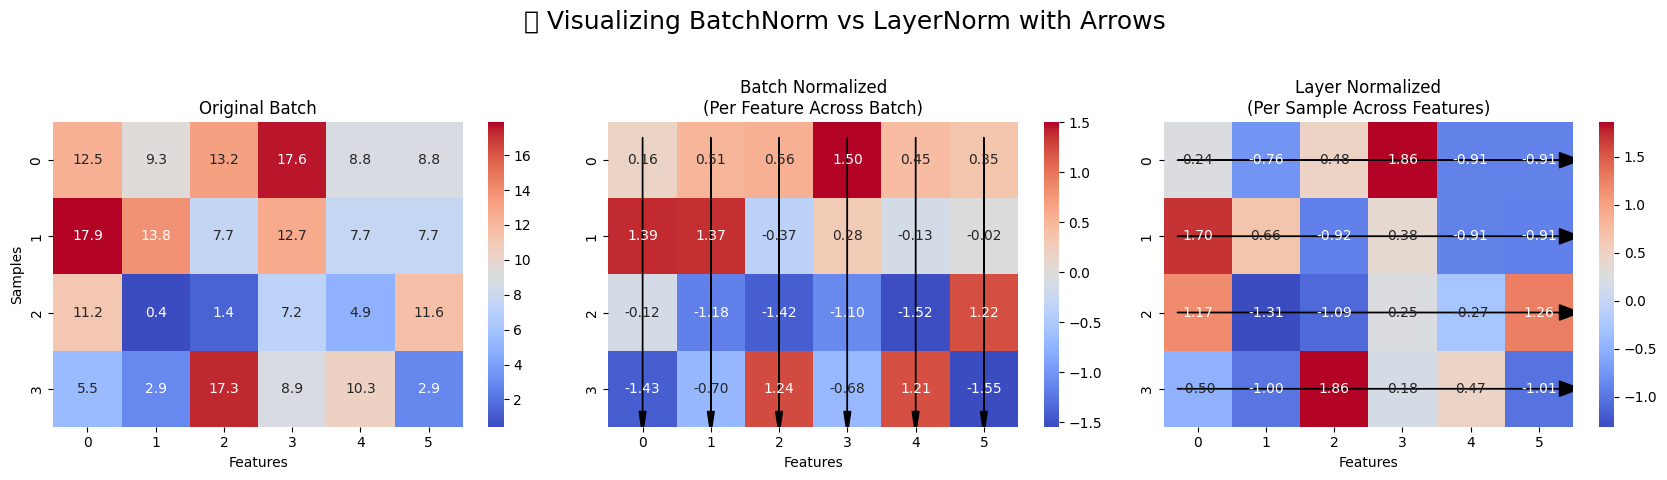

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a batch: shape (batch_size, num_features)
np.random.seed(42)
batch = np.random.randn(4, 6) * 5 + 10  # 4 samples, 6 features

# Batch Normalization (normalize per feature / column)
bn_mean = batch.mean(axis=0, keepdims=True)
bn_std = batch.std(axis=0, keepdims=True)
batch_normed = (batch - bn_mean) / bn_std

# Layer Normalization (normalize per sample / row)
ln_mean = batch.mean(axis=1, keepdims=True)
ln_std = batch.std(axis=1, keepdims=True)
layer_normed = (batch - ln_mean) / ln_std

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

# Original heatmap
sns.heatmap(batch, ax=axs[0], cmap="coolwarm", cbar=True, annot=True, fmt=".1f")
axs[0].set_title("Original Batch")
axs[0].set_xlabel("Features")
axs[0].set_ylabel("Samples")

# Batch Normalized heatmap
sns.heatmap(batch_normed, ax=axs[1], cmap="coolwarm", cbar=True, annot=True, fmt=".2f")
axs[1].set_title("Batch Normalized\n(Per Feature Across Batch)")
axs[1].set_xlabel("Features")
axs[1].set_ylabel("")

# Add arrows to show column-wise normalization
for j in range(batch.shape[1]):  # feature
    axs[1].arrow(j + 0.5, 0.2, 0, 3.6, head_width=0.1, head_length=0.3, fc='k', ec='k')

# Layer Normalized heatmap
sns.heatmap(layer_normed, ax=axs[2], cmap="coolwarm", cbar=True, annot=True, fmt=".2f")
axs[2].set_title("Layer Normalized\n(Per Sample Across Features)")
axs[2].set_xlabel("Features")
axs[2].set_ylabel("")

# Add arrows to show row-wise normalization
for i in range(batch.shape[0]):  # sample
    axs[2].arrow(0.2, i + 0.5, 5.6, 0, head_width=0.2, head_length=0.3, fc='k', ec='k')

# Add main title
plt.suptitle("🔍 Visualizing BatchNorm vs LayerNorm with Arrows", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


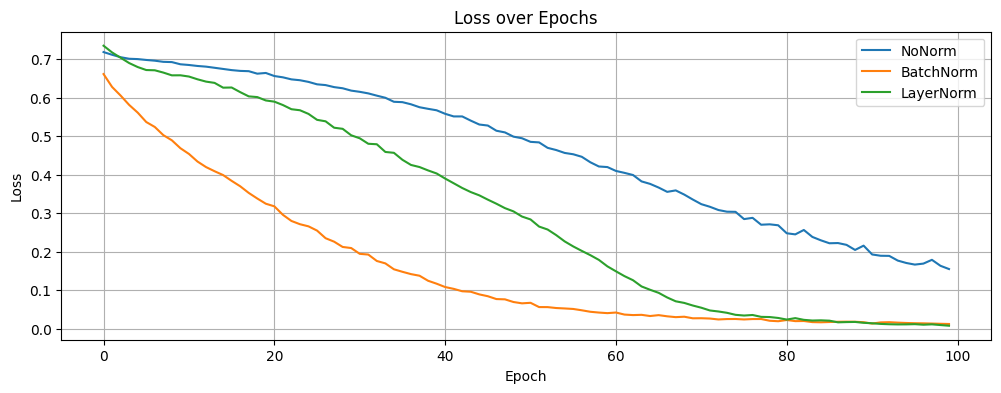

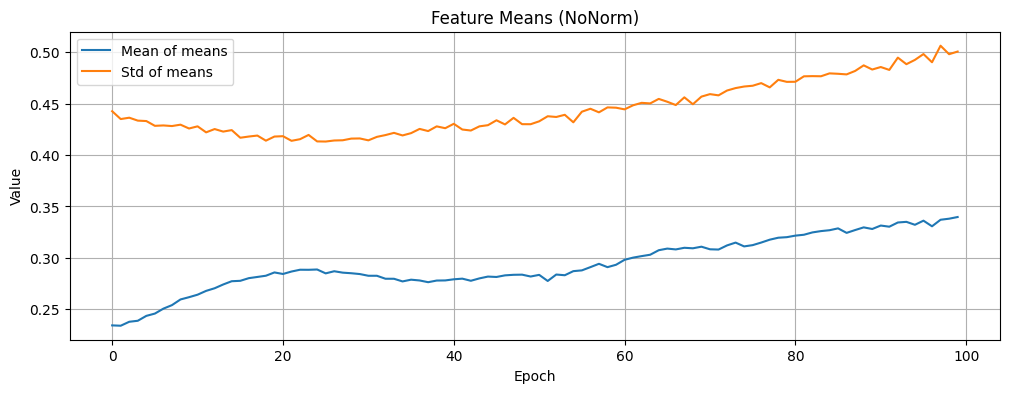

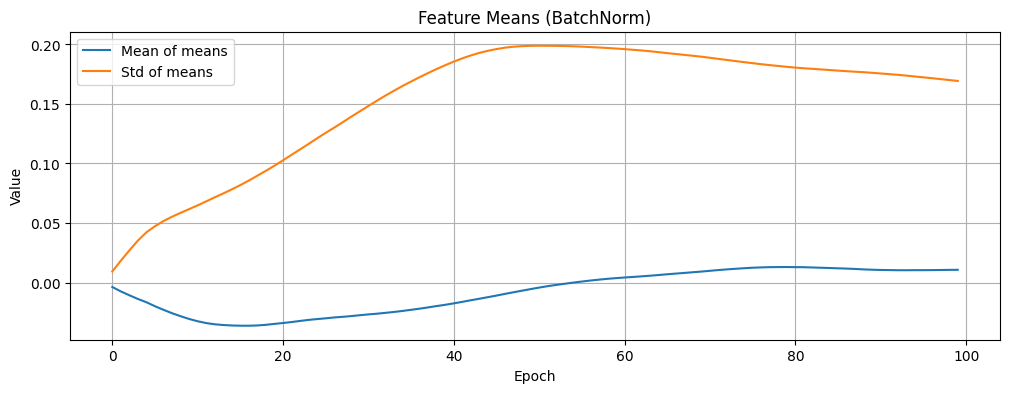

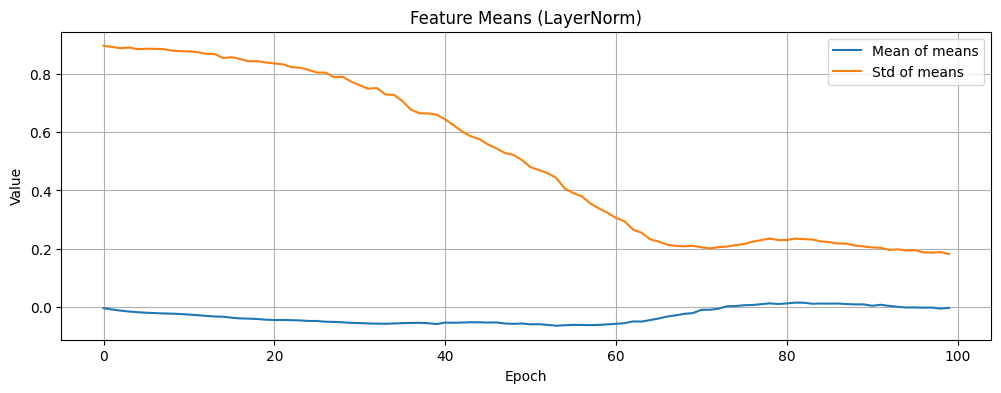

/tmp/ipykernel_67743/3430048569.py:106: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=feats, inner="quartile", palette="Set2", bw=0.4)


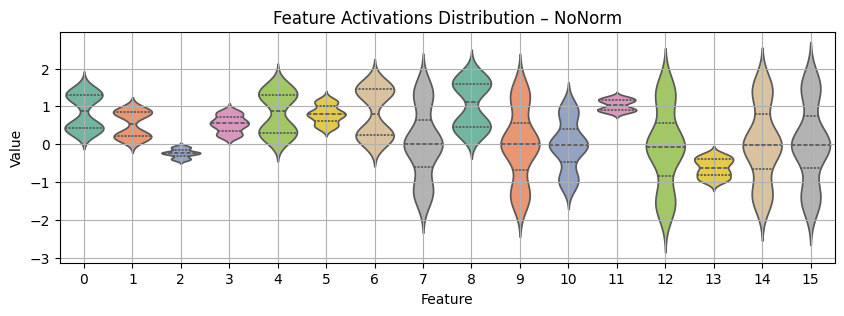

/tmp/ipykernel_67743/3430048569.py:106: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=feats, inner="quartile", palette="Set2", bw=0.4)


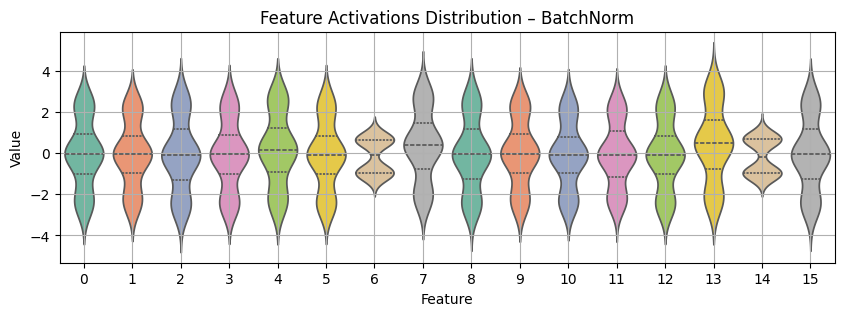

/tmp/ipykernel_67743/3430048569.py:106: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(data=feats, inner="quartile", palette="Set2", bw=0.4)


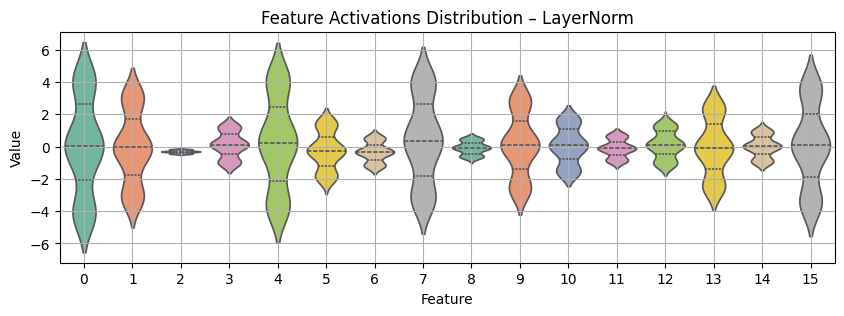

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Synthetic dataset: XOR repeated with noise
def generate_data(n=512):
    base = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
    labels = torch.tensor([[0.], [1.], [1.], [0.]])
    X = base.repeat(n // 4, 1) + 0.1 * torch.randn(n, 2)
    y = labels.repeat(n // 4, 1)
    return X, y

# Models
class MLP(nn.Module):
    def __init__(self, norm=None):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.act1 = nn.ReLU()
        self.norm1 = {
            'batch': nn.BatchNorm1d(16),
            'layer': nn.LayerNorm(16),
            None: nn.Identity()
        }[norm]
        self.fc2 = nn.Linear(16, 1)
        self.out = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.norm1(x)
        x = self.act1(x)
        return self.out(self.fc2(x))

# Train and track stats
def train_and_track(norm_type):
    model = MLP(norm=norm_type)
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()

    batch_means = []
    batch_stds = []
    losses = []

    for epoch in range(100):
        X, y = generate_data(n=128)
        model.train()
        pred = model(X)
        loss = criterion(pred, y)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            pre_activ = model.fc1(X)
            normed = model.norm1(pre_activ)
            batch_means.append(normed.mean(dim=0).numpy())
            batch_stds.append(normed.std(dim=0).numpy())

    return losses, np.array(batch_means), np.array(batch_stds), model

# Train 3 models: NoNorm, BatchNorm, LayerNorm
torch.manual_seed(42)
loss_none, mean_none, std_none, model_none = train_and_track(None)
loss_bn, mean_bn, std_bn, model_bn = train_and_track('batch')
loss_ln, mean_ln, std_ln, model_ln = train_and_track('layer')

# --- Plot: Loss curves
plt.figure(figsize=(12, 4))
plt.plot(loss_none, label="NoNorm")
plt.plot(loss_bn, label="BatchNorm")
plt.plot(loss_ln, label="LayerNorm")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# --- Plot: Mean & Std evolution per batch
def plot_norm_stats(stats, title):
    plt.figure(figsize=(12, 4))
    plt.plot(stats.mean(axis=1), label="Mean of means")
    plt.plot(stats.std(axis=1), label="Std of means")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_norm_stats(mean_none, "Feature Means (NoNorm)")
plot_norm_stats(mean_bn, "Feature Means (BatchNorm)")
plot_norm_stats(mean_ln, "Feature Means (LayerNorm)")

# --- Violin Plot: Final feature distributions
def plot_violin(model, label):
    X, _ = generate_data(256)
    with torch.no_grad():
        feats = model.norm1(model.fc1(X)).detach().numpy()

    plt.figure(figsize=(10, 3))
    sns.violinplot(data=feats, inner="quartile", palette="Set2", bw=0.4)
    plt.title(f"Feature Activations Distribution – {label}")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

plot_violin(model_none, "NoNorm")
plot_violin(model_bn, "BatchNorm")
plot_violin(model_ln, "LayerNorm")


# Weight Initialization

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate random input data
torch.manual_seed(0)
x = torch.randn(512, 64)

# Define a generic 3-layer MLP
class MLP(nn.Module):
    def __init__(self, init_fn):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 64)
        self.activation = nn.ReLU()

        # Apply initialization
        for layer in [self.fc1, self.fc2, self.fc3]:
            init_fn(layer.weight)
            nn.init.zeros_(layer.bias)

    def forward(self, x):
        a1 = self.activation(self.fc1(x))
        a2 = self.activation(self.fc2(a1))
        a3 = self.activation(self.fc3(a2))
        return a1, a2, a3

# Define different initialization strategies
init_methods = {
    "Normal(0,1)": lambda w: nn.init.normal_(w, mean=0.0, std=1.0),
    "Uniform(-1,1)": lambda w: nn.init.uniform_(w, a=-1.0, b=1.0),
    "Xavier Normal": lambda w: nn.init.xavier_normal_(w),
    "Xavier Uniform": lambda w: nn.init.xavier_uniform_(w),
    "Kaiming Normal": lambda w: nn.init.kaiming_normal_(w, nonlinearity='relu'),
    "Kaiming Uniform": lambda w: nn.init.kaiming_uniform_(w, nonlinearity='relu'),
}

# Store activations
all_activations = {}

for name, init_fn in init_methods.items():
    model = MLP(init_fn)
    with torch.no_grad():
        a1, a2, a3 = model(x)
        all_activations[name] = {
            "layer1": a1,
            "layer2": a2,
            "layer3": a3,
        }

summary_means = {}
summary_stds = {}

for name, acts in all_activations.items():
    means = [acts[layer].mean().item() for layer in ["layer1", "layer2", "layer3"]]
    stds = [acts[layer].std().item() for layer in ["layer1", "layer2", "layer3"]]
    summary_means[name] = means
    summary_stds[name] = stds


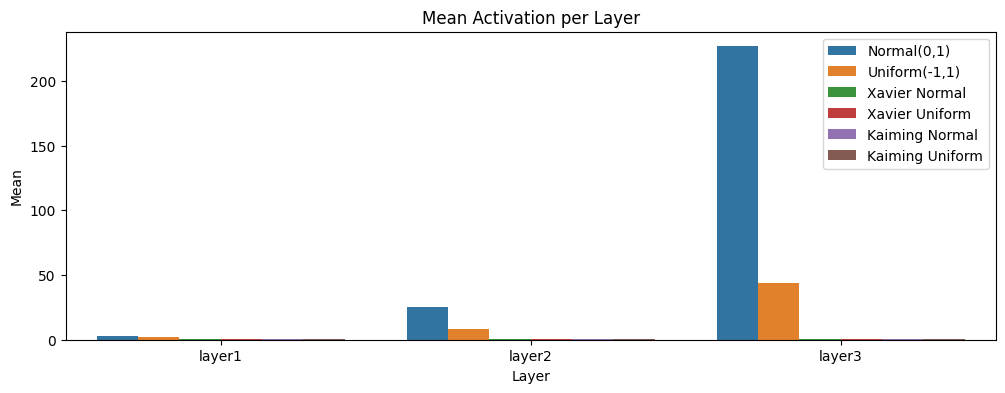

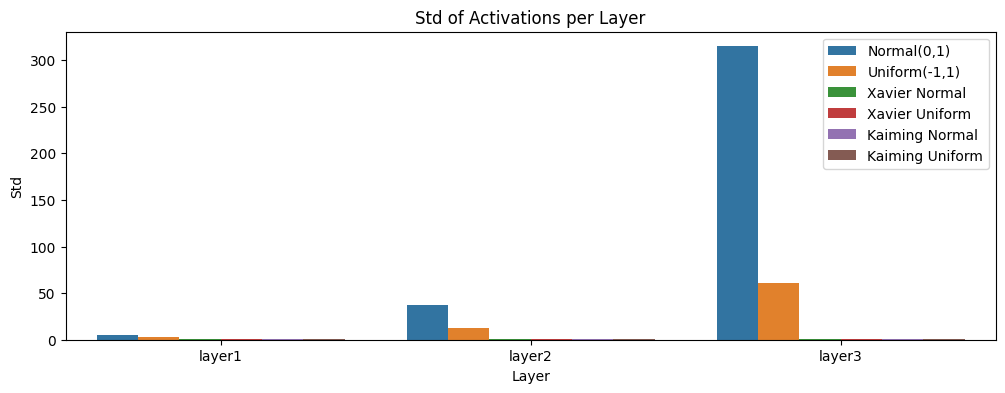

In [ ]:
import pandas as pd

methods = list(summary_means.keys())
layers = ["layer1", "layer2", "layer3"]

# Convert to DataFrames
df_mean = pd.DataFrame(summary_means, index=layers).T
df_std = pd.DataFrame(summary_stds, index=layers).T

# Melt for seaborn
df_mean_long = df_mean.reset_index().melt(id_vars="index", var_name="Layer", value_name="Mean")
df_std_long = df_std.reset_index().melt(id_vars="index", var_name="Layer", value_name="Std")
df_mean_long.rename(columns={"index": "Method"}, inplace=True)
df_std_long.rename(columns={"index": "Method"}, inplace=True)

# Plot mean
plt.figure(figsize=(12, 4))
sns.barplot(data=df_mean_long, x="Layer", y="Mean", hue="Method")
plt.title("Mean Activation per Layer")
plt.legend(loc='upper right')
plt.show()

# Plot std
plt.figure(figsize=(12, 4))
sns.barplot(data=df_std_long, x="Layer", y="Std", hue="Method")
plt.title("Std of Activations per Layer")
plt.legend(loc='upper right')
plt.show()


# 🎯 Weight Initialization Strategies in Neural Networks

Proper weight initialization is **crucial** for training deep neural networks. Poor initialization can cause:
- Exploding gradients 🚀
- Vanishing gradients 🫥
- Slow or unstable training 🐌

Your experiment explores several strategies by observing how activations behave across layers in a 3-layer MLP.

---

## 🏗️ Model Architecture

You used a 3-layer MLP with ReLU activation:

```plaintext
Input (64) → Linear(64 → 128) → ReLU → Linear(128 → 128) → ReLU → Linear(128 → 64)
```

The goal is to examine how each initialization affects the **activation statistics (mean & std)** across layers.

---

## ⚙️ Initialization Methods Explained

### 1. 🧪 **Normal(0, 1)**

```python
nn.init.normal_(weight, mean=0.0, std=1.0)
```

- Draws weights from a standard normal distribution $\mathcal{N}(0, 1)$.
- ❌ *Not aware of layer width*, so it may cause **activation explosion** or **vanishing**, especially in deep networks.

### 2. 📦 **Uniform(-1, 1)**

```python
nn.init.uniform_(weight, a=-1.0, b=1.0)
```

- Samples weights uniformly from the interval \([-1, 1]\).
- Like normal, this is **uninformed** about the layer size, so it may lead to instability in deep nets.

---

## 🎯 Xavier Initialization (Glorot Initialization)

Designed for **tanh** or **sigmoid** activations (but still used with ReLU). Keeps **variance of activations** consistent across layers.

Let:
- $\text{fan\_in} =$ number of input units
- $\text{fan\_out} =$ number of output units

Then Xavier uses:
$$
\text{Var}(w) = \frac{2}{\text{fan\_in} + \text{fan\_out}}
$$

### 3. 🔵 **Xavier Normal**

```python
nn.init.xavier_normal_(weight)
```

- Samples from $\mathcal{N}(0, \text{std})$, where $\text{std} = \sqrt{2 / (\text{fan\_in} + \text{fan\_out})}$

### 4. 🟢 **Xavier Uniform**

```python
nn.init.xavier_uniform_(weight)
```

- Samples from $\mathcal{U}(-a, a)$, where $a = \sqrt{6 / (\text{fan\_in} + \text{fan\_out})}$

✅ Better suited for **symmetrical activations** (like `tanh`), but often works decently with ReLU as well.

---

## ⚡ Kaiming Initialization (He Initialization)

Designed **specifically for ReLU** and its variants. Kaiming sets the variance to:

$$
\text{Var}(w) = \frac{2}{\text{fan\_in}}
$$

### 5. 🔥 **Kaiming Normal**

```python
nn.init.kaiming_normal_(weight, nonlinearity='relu')
```

- Draws from $\mathcal{N}(0, \text{std})$, where $\text{std} = \sqrt{2 / \text{fan\_in}}$

### 6. 💥 **Kaiming Uniform**

```python
nn.init.kaiming_uniform_(weight, nonlinearity='relu')
```

- Draws from $\mathcal{U}(-a, a)$, where $a = \sqrt{6 / \text{fan\_in}}$

✅ **Highly recommended for ReLU** networks. Keeps activations stable and gradients flowing even in deep networks.

---

## 📊 Activation Statistics

In your code, you collected:

- **Mean** and **standard deviation** of activations at each layer
- For each initialization method

This helps you empirically verify whether activations stay **centered** and **well-scaled** across layers — a good sign that initialization is working well.

---

## 📌 Summary Table (Qualitative)

| Initialization     | Aware of Layer Size? | Suitable for ReLU? | Typical Activation Behavior |
|--------------------|----------------------|---------------------|-----------------------------|
| Normal(0,1)        | ❌                  | ❌                  | Unstable                    |
| Uniform(-1,1)      | ❌                  | ❌                  | Often unstable              |
| Xavier Normal      | ✅                  | ⚠️ (okay)           | Balanced, risk of vanishing |
| Xavier Uniform     | ✅                  | ⚠️ (okay)           | Balanced, risk of vanishing |
| Kaiming Normal     | ✅                  | ✅                  | Stable and efficient        |
| Kaiming Uniform    | ✅                  | ✅                  | Stable and efficient        |

# Loss Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of logits (predicted scores for the correct class)
logits = np.linspace(-5, 5, 500)
probs = 1 / (1 + np.exp(-logits))  # sigmoid activation

# CrossEntropy loss
cross_entropy = -np.log(probs + 1e-8)

# Focal loss (gamma = 2)
gamma = 2
focal_loss = -(1 - probs) ** gamma * np.log(probs + 1e-8)

# Hinge loss: max(0, 1 - y*logit), assuming y = 1
hinge_loss = np.maximum(0, 1 - logits)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(logits, cross_entropy, label="CrossEntropy", linewidth=2)
plt.plot(logits, focal_loss, label="FocalLoss (γ=2)", linewidth=2)
plt.plot(logits, hinge_loss, label="HingeLoss (y=1)", linewidth=2)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Logit for True Class")
plt.ylabel("Loss")
plt.title("📈 Classification Loss Functions")
plt.legend()
plt.grid(True)
plt.show()


/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


## 📉 **X-Axis: Logit for True Class**
- This is the raw score (logit) output by the model **for the correct class**.
- More **positive logits** → model is more confident in the correct class.
- More **negative logits** → model is predicting **other classes more confidently** than the correct one.

---

## 📈 **Y-Axis: Loss**
- Lower loss means better performance.
- Loss functions penalize incorrect or uncertain predictions.
- We want loss to **decrease** as the model becomes more confident in the correct prediction (logit increases).

---

## 🔵 **Cross Entropy (Blue Line)**
- Standard loss for multi-class classification.
- **Smooth exponential decay**: as the logit for the correct class increases, the loss sharply decreases.
- Even small increases in confidence yield smaller and smaller improvements.

---

## 🟠 **Focal Loss (Orange Line, γ=2)**
- Focuses training on **hard, misclassified examples**.
- When logit is low (poor prediction), loss is higher than cross-entropy.
- But as the model becomes confident (logit increases), the loss decays **faster** than cross-entropy.
- **Flatter tail**: focal loss **down-weights easy examples** (already confident predictions).

### 👉 Interpretation:
- This encourages the model to **pay less attention to already-correct predictions**, focusing learning on hard cases.

---

## 🟢 **Hinge Loss (Green Line, y=1)**
- Used in SVMs, enforces a **margin** of separation.
- Loss is **linear** when the prediction is incorrect or within the margin (logit < 1).
- Once the logit for the correct class passes **1**, loss becomes **zero**.
- Doesn't reward "overconfidence" like CE or Focal Loss.

### 👉 Interpretation:
- Hinge loss wants the correct class to **score at least +1**, but doesn't push further.
- Once you're beyond the margin, you get no reward.

---

## 🔍 **Vertical Line at x = 0**
- This is the tipping point where:
  - If logit < 0 → model favors a wrong class.
  - If logit > 0 → model favors the correct class.
- You can see how all losses are **high on the left (bad prediction)** and **low on the right (good prediction)**.

---

## 🧠 Summary of Behaviors

| Loss        | Focus                          | Reward Beyond Margin | Use Case                              |
|-------------|--------------------------------|-----------------------|----------------------------------------|
| Cross Entropy | Probabilistic confidence      | Yes                  | Standard classification                |
| Focal Loss   | Hard examples (imbalanced data) | Yes, less aggressively | Imbalanced datasets                    |
| Hinge Loss   | Margins and separability      | No (zero after margin) | SVM-style margin enforcement           |

/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


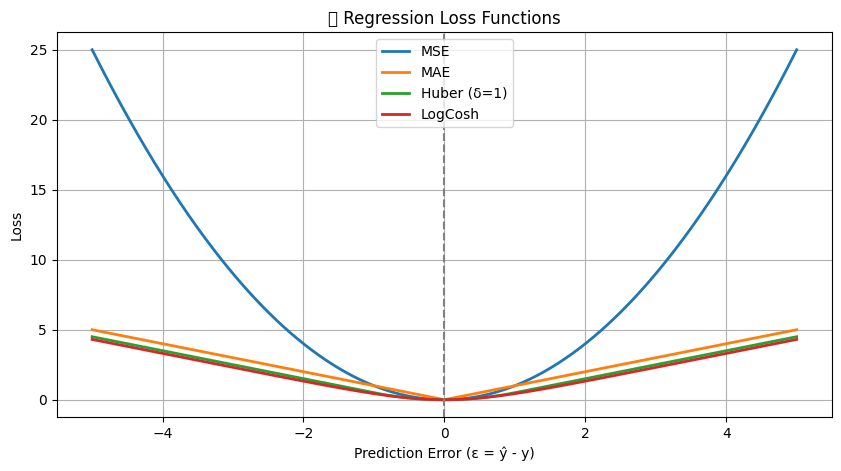

In [ ]:
# Prediction error
eps = np.linspace(-5, 5, 500)

mse = eps ** 2
mae = np.abs(eps)
huber = np.where(np.abs(eps) < 1, 0.5 * eps**2, np.abs(eps) - 0.5)
logcosh = np.log(np.cosh(eps))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(eps, mse, label="MSE", linewidth=2)
plt.plot(eps, mae, label="MAE", linewidth=2)
plt.plot(eps, huber, label="Huber (δ=1)", linewidth=2)
plt.plot(eps, logcosh, label="LogCosh", linewidth=2)
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Prediction Error (ε = ŷ - y)")
plt.ylabel("Loss")
plt.title("📉 Regression Loss Functions")
plt.legend()
plt.grid(True)
plt.show()


# 🧠 Loss Functions: Mathematical Formulations

---

## 📈 **Classification Losses**

### 1. **Cross Entropy Loss**

Used for multi-class classification. If the true class is $y \in \{1, \dots, C\}$, and the model outputs a probability vector $\hat{p} = \text{softmax}(z)$, then:

$$
\mathcal{L}_{\text{CE}}(y, \hat{p}) = -\log(\hat{p}_y)
$$

If you have logits $z \in \mathbb{R}^C$, the softmax is:

$$
\hat{p}_i = \frac{e^{z_i}}{\sum_{j=1}^{C} e^{z_j}}, \quad \text{and} \quad \mathcal{L}_{\text{CE}} = -\log\left( \frac{e^{z_y}}{\sum_{j=1}^{C} e^{z_j}} \right)
$$

---

### 2. **Focal Loss**

Designed for **imbalanced classification** to reduce the influence of well-classified examples. Given the true label $y \in \{0, 1\}$ and predicted probability $p$, the loss is:

$$
\mathcal{L}_{\text{Focal}}(p) = - (1 - p_y)^\gamma \cdot \log(p_y)
$$

- $p_y$ is the model's predicted probability for the true class
- $\gamma \geq 0$ is a focusing parameter (commonly $\gamma = 2$)

This down-weights easy examples and focuses training on hard ones.

---

### 3. **Hinge Loss (for binary SVM)**

Used in Support Vector Machines (SVM). For binary classification with label $y \in \{-1, +1\}$ and a logit score $z$:

$$
\mathcal{L}_{\text{Hinge}}(z, y) = \max(0, 1 - y \cdot z)
$$

This enforces a **margin** between classes. Correct predictions inside the margin still incur a loss.

---

## 📉 **Regression Losses**

### 1. **Mean Squared Error (MSE / L2 Loss)**

$$
\mathcal{L}_{\text{MSE}}(\hat{y}, y) = (\hat{y} - y)^2
$$

- Sensitive to outliers due to the square.
- Smooth and differentiable.

---

### 2. **Mean Absolute Error (MAE / L1 Loss)**

$$
\mathcal{L}_{\text{MAE}}(\hat{y}, y) = |\hat{y} - y|
$$

- More robust to outliers.
- Not differentiable at 0, but subgradients can be used.

---

### 3. **Huber Loss**

Smooth hybrid of MSE and MAE, defined as:

$$
\mathcal{L}_{\text{Huber}}(\hat{y}, y) =
\begin{cases}
\frac{1}{2}(\hat{y} - y)^2 & \text{if } |\hat{y} - y| \leq \delta \\
\delta \cdot \left(|\hat{y} - y| - \frac{1}{2}\delta \right) & \text{otherwise}
\end{cases}
$$

- $\delta$ is a threshold (e.g., 1)
- Smooth at origin, MAE behavior in tail

---

### 4. **Log-Cosh Loss**

$$
\mathcal{L}_{\text{LogCosh}}(\hat{y}, y) = \log\left( \cosh(\hat{y} - y) \right)
$$

- Smooth and differentiable
- Approximates MAE but behaves like MSE near 0
- Numerically stable for large errors

---

## 🧩 Summary Table

| Loss Function    | Formula                                                                 | Robust to Outliers | Smooth | Use Case                              |
|------------------|-------------------------------------------------------------------------|--------------------|--------|----------------------------------------|
| MSE              | $(\hat{y} - y)^2$                                                   | ❌                 | ✔️     | General regression                     |
| MAE              | $|\hat{y} - y|$                                                     | ✔️                 | ❌     | Robust regression                      |
| Huber            | MSE inside $\delta$, MAE outside                                    | ✔️                 | ✔️     | Best of both worlds                    |
| Log-Cosh         | $\log(\cosh(\hat{y} - y))$                                          | ✔️                 | ✔️     | Smooth robust regression               |
| CrossEntropy     | $-\log(p_y)$                                                        | ❌                 | ✔️     | Standard classification                |
| Focal Loss       | $-(1 - p_y)^\gamma \cdot \log(p_y)$                                | ✔️                 | ✔️     | Imbalanced classification              |
| Hinge Loss       | $\max(0, 1 - y \cdot z)$                                            | ❌                 | ❌     | SVM-style margins                      |


## 🧠 **Difference Between Cross Entropy and Binary Cross Entropy**

### 🔢 **1. Cross Entropy Loss (Multi-Class Classification)**

**Used when**:
- You have **more than two** classes (multi-class classification).
- Each input belongs to **exactly one** of the $C$ classes.

**Model Output**:
- A vector of logits $z \in \mathbb{R}^C$ passed through **softmax** to get class probabilities $\hat{p}$.

**Formula**:
If the true label is class $y \in \{1, ..., C\}$, and the predicted class probabilities are $\hat{p}_1, \dots, \hat{p}_C$, then:
$$
\mathcal{L}_{\text{CE}} = -\log(\hat{p}_y)
$$

**PyTorch Equivalent**:
```python
nn.CrossEntropyLoss()
```
*(expects raw logits, applies softmax internally)*

---

### ⚖️ **2. Binary Cross Entropy Loss (Binary or Multi-Label Classification)**

**Used when**:
- You have **binary classification** (one output node) or **multi-label classification** (multiple binary outputs).
- Each class is **independent** — meaning the same input can belong to **multiple classes** (e.g., cats *and* dogs).

**Model Output**:
- A scalar or vector of probabilities from a **sigmoid** function: $\hat{p} = \sigma(z)$.

**Formula (for a single label)**:
$$
\mathcal{L}_{\text{BCE}} = -\left[ y \cdot \log(\hat{p}) + (1 - y) \cdot \log(1 - \hat{p}) \right]
$$

**PyTorch Equivalent**:
```python
nn.BCELoss()           # expects probabilities
nn.BCEWithLogitsLoss() # expects raw logits (more stable)
```

---

### 📊 **Key Differences**

| Feature                     | Cross Entropy (CE)                    | Binary Cross Entropy (BCE)                            |
|----------------------------|----------------------------------------|-------------------------------------------------------|
| Task Type                  | Multi-class                           | Binary or Multi-label                                 |
| Output Activation          | **Softmax** (mutually exclusive)      | **Sigmoid** (independent class probabilities)         |
| Label Format               | Single class index (e.g. `2`)         | Vector of 0s and 1s (e.g. `[1, 0, 1]`)                |
| Class Dependency           | Assumes **mutual exclusivity**        | Assumes **independent labels**                        |
| Output Shape               | $\mathbb{R}^C$                    | $\mathbb{R}$ (binary) or $\mathbb{R}^C$ (multi-label) |
| PyTorch Loss               | `nn.CrossEntropyLoss()`               | `nn.BCELoss()` / `nn.BCEWithLogitsLoss()`             |

---

### 🧠 Examples:

#### CE: Multi-Class (A, B, C — one-hot style)
Input: "A"  
Target: Class 0  
Model output (logits): `[2.0, 1.0, 0.1]`  
Prediction: softmax → `[0.71, 0.26, 0.03]`  
Loss: `-log(0.71)`

#### BCE: Binary
Input: "A"  
Target: `1`  
Model output (logit): `2.0` → sigmoid → `0.88`  
Loss: `-log(0.88)`

# Activations

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Activations dictionary
activations = {
    "ReLU": F.relu,
    "LeakyReLU": F.leaky_relu,
    "Sigmoid": torch.sigmoid,
    "Tanh": torch.tanh,
    "GELU": F.gelu,
    "Swish": lambda x: x * torch.sigmoid(x)
}

class MLP(nn.Module):
    def __init__(self, act_fn):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)
        self.act_fn = act_fn
        self.weight_trajectory = []

    def forward(self, x):
        x = self.act_fn(self.fc1(x))
        self.weight_trajectory.append(self.fc1.weight.data.clone().numpy())
        x = self.fc2(x)
        return x

def train_and_track(act_fn, name):
    model = MLP(act_fn)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()

    for epoch in range(100):
        logits = model(X)
        loss = loss_fn(logits, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return np.array(model.weight_trajectory)  # shape (epochs, out_features, in_features)

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, (name, act) in enumerate(activations.items()):
    W = train_and_track(act, name)[:, 0, :]  # just track 1st neuron
    axs[i].plot(W[:, 0], W[:, 1], marker='o', markersize=2)
    axs[i].set_title(f"{name} Activation\nWeight[0] Trajectory")
    axs[i].set_xlabel("W[0]")
    axs[i].set_ylabel("W[1]")
    axs[i].grid(True)

plt.suptitle("🔁 Weight Evolution with Different Activation Functions", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/tmp/ipykernel_1378/3953486750.py:63: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## 📊 What This Plot Shows

- Each subplot shows the **trajectory of a single neuron's weights** (`w[0]`, `w[1]`) over training time (each point = one epoch).
- Each row/column represents a different **activation function** used in a single-layer neural network.
- This helps **visualize how gradients propagate** and how updates behave differently depending on the activation function.

---

## 🧠 Interpretation by Activation Function

### 🔵 **ReLU**
- **Shape**: Smooth, curved descent followed by flatness.
- **Insight**: ReLU tends to "kill" neurons if inputs fall into the zero region → gradient becomes zero → dead weight updates.
- You can even **see it flatten** (weight stops moving).

---

### 🟠 **LeakyReLU**
- **Shape**: Smooth trajectory, with oscillations.
- **Insight**: Keeps a small slope for negative inputs → avoids dead neurons → **better gradient flow** than ReLU.
- Trajectory is more dynamic and responsive.

---

### 🟡 **Sigmoid**
- **Shape**: Slows down over time, almost curling.
- **Insight**: Saturates in both directions → **vanishing gradients** → weight updates shrink as activations approach 0 or 1.
- This is a visual proof of why sigmoid is rarely used in hidden layers now.

---

### 🟣 **Tanh**
- **Shape**: Smooth but spiraling slowdown.
- **Insight**: Centered at 0 (unlike sigmoid), but still saturates for large inputs → can still lead to vanishing gradients, though better than sigmoid.
- Useful when centered outputs help (e.g., in LSTMs).

---

### 🟢 **GELU**
- **Shape**: Gentle arc, nonlinear curve.
- **Insight**: Smooth and nonlinear like sigmoid/tanh, but designed to **approximate ReLU’s benefits** with better gradients for low inputs.
- Often used in modern Transformer blocks.

---

### 🔵 **Swish**
- **Shape**: Curved descent with noticeable "pause" or flat segment.
- **Insight**: Self-gated (x * sigmoid(x)) — maintains smoothness **and** allows gradient even for negative x.
- Strikes a **balance** between ReLU sharpness and Sigmoid smoothness.

---

## 🎓 Teaching Summary Table

| Activation | Gradient Flow | Risk of Dead Neurons | Saturation Risk | Trajectory Behavior |
|------------|----------------|----------------------|------------------|---------------------|
| ReLU       | Sharp & sparse | ✅ High              | ❌ No            | Flat after 0        |
| LeakyReLU  | Smooth-ish      | ❌ No                | ❌ No            | Steady oscillation  |
| Sigmoid    | Weak            | ❌ No                | ✅ Yes           | Compressed, slow    |
| Tanh       | Better than Sigmoid | ❌ No           | ✅ Yes           | Centered slowdown   |
| GELU       | Smooth & stable | ❌ Low               | ✅ Slight        | Curved, soft        |
| Swish      | Smooth & gated  | ❌ No                | ❌ Minimal       | Gentle curves       |

---

## 📚 Why This Is So Valuable

This plot:
- **Connects activation choice to learning dynamics**
- Shows **where and why gradients might vanish**
- Highlights **the importance of nonlinearity design** in deep learning architectures

# Schedulers

Training models with different activation functions...
Training with ReLU...
Training with LeakyReLU...
Training with Sigmoid...
Training with Tanh...
Training with GELU...
Training with Swish...
Generating visualizations...


/home/seman/aulas_2025_1/.venv/lib/python3.13/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


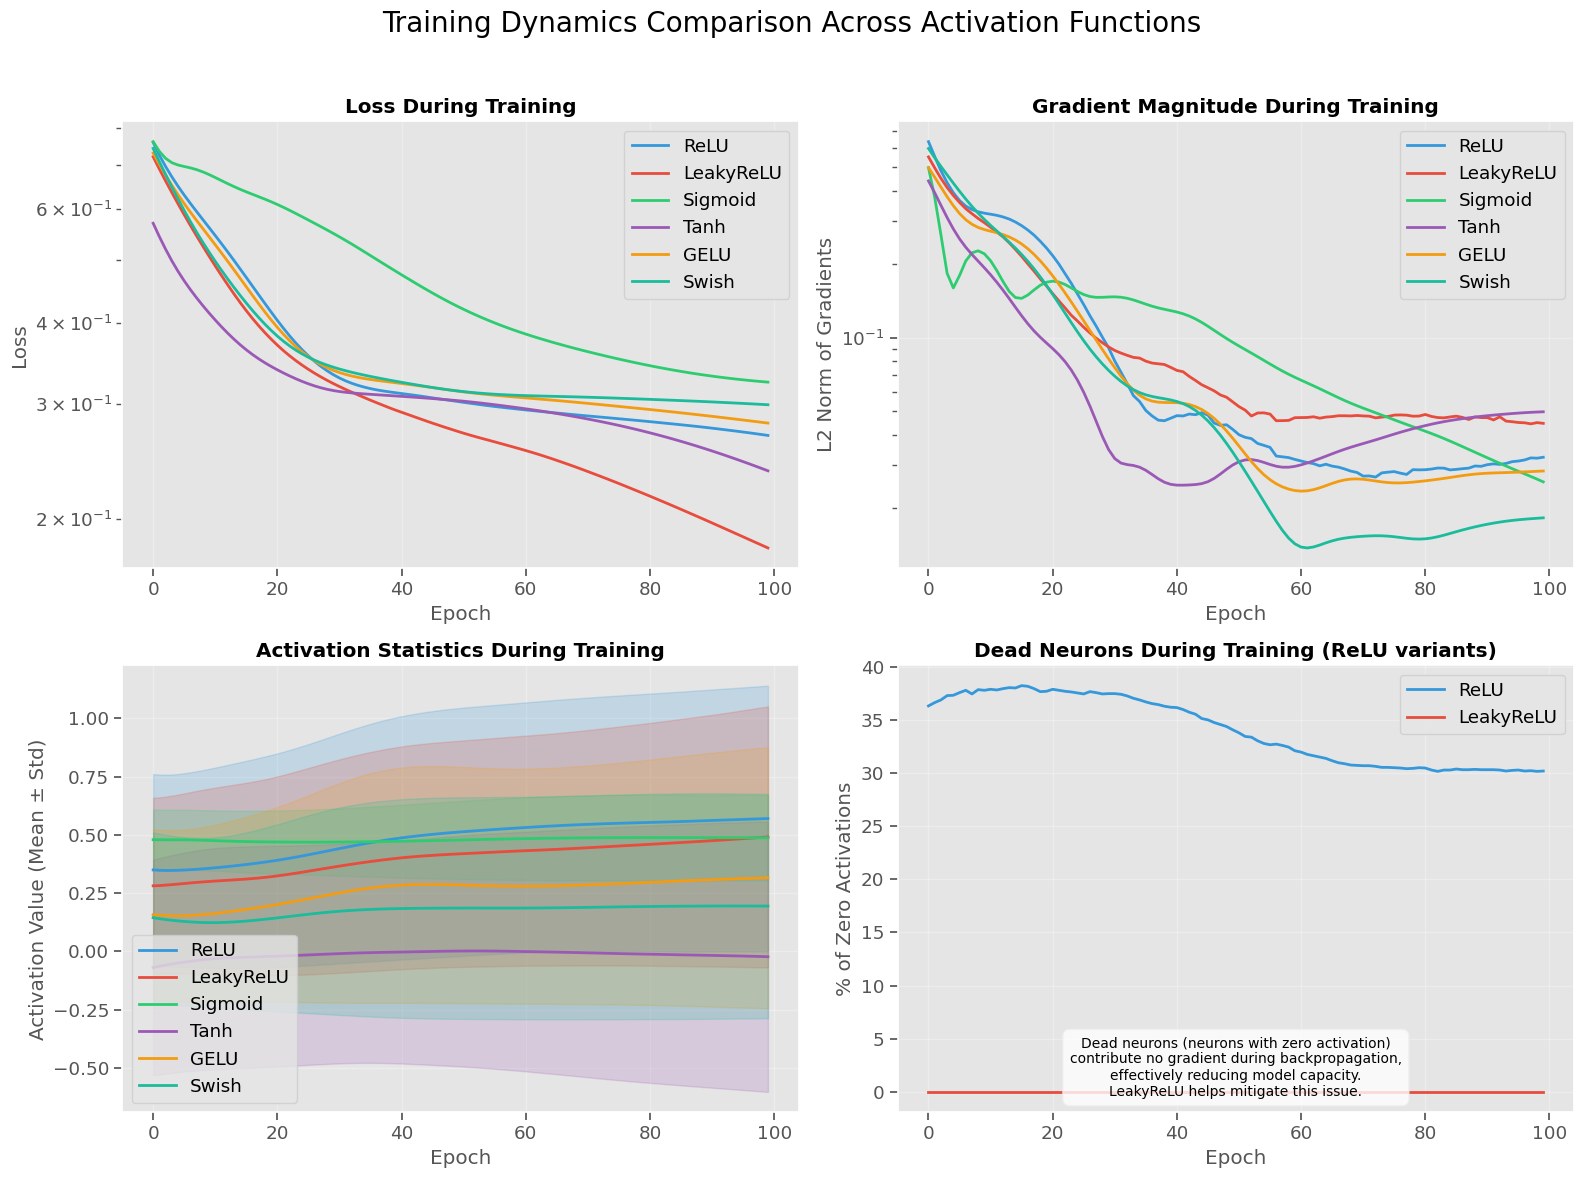

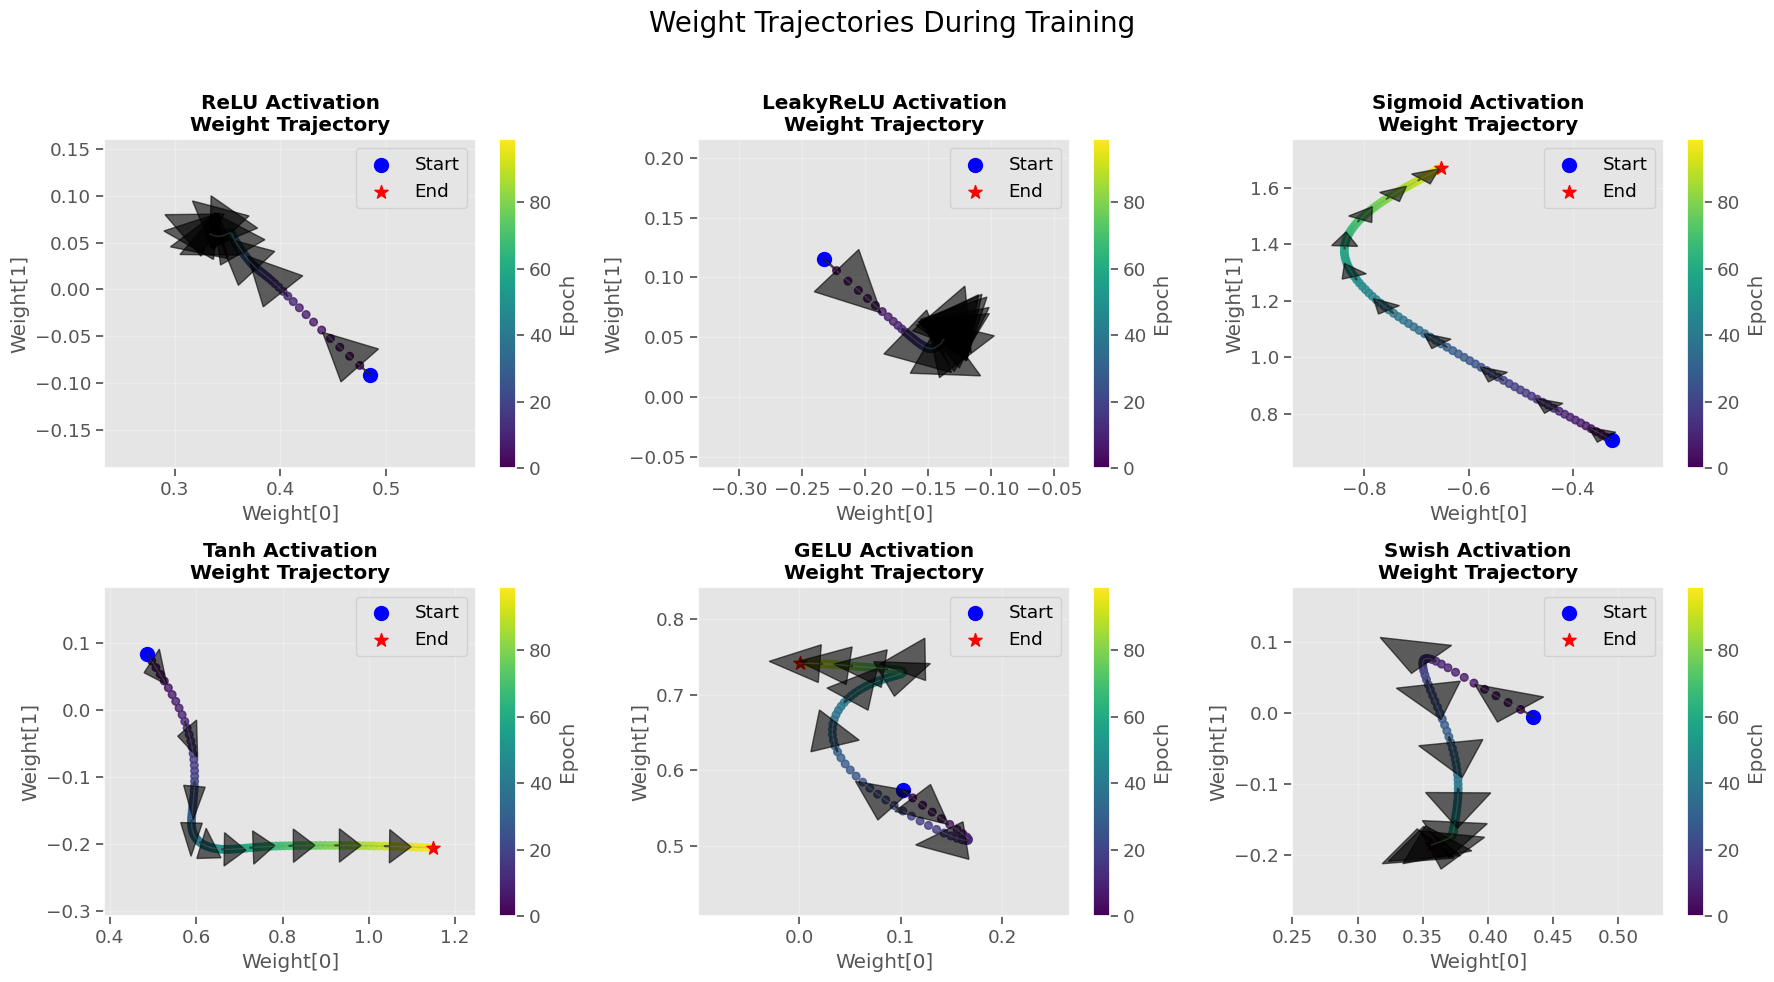

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Increase font size for better readability
plt.rcParams.update({'font.size': 12})

# Create a more visually appealing color palette
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c']

# Dataset
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Activations dictionary
activations = {
    "ReLU": F.relu,
    "LeakyReLU": F.leaky_relu,
    "Sigmoid": torch.sigmoid,
    "Tanh": torch.tanh,
    "GELU": F.gelu,
    "Swish": lambda x: x * torch.sigmoid(x)
}

class MLP(nn.Module):
    def __init__(self, act_fn):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)
        self.act_fn = act_fn
        
        # Track more metrics
        self.weight_trajectory = []
        self.gradient_norms = []
        self.activations_hist = []
        self.decision_boundaries = []
        self.losses = []
        
    def forward(self, x):
        z1 = self.fc1(x)
        a1 = self.act_fn(z1)
        
        # Store activation statistics
        if self.training:
            self.activations_hist.append({
                'mean': a1.mean().item(),
                'std': a1.std().item(),
                'min': a1.min().item(),
                'max': a1.max().item(),
                'zero_percent': (a1 == 0).float().mean().item() * 100  # % of zeros (dead neurons)
            })
            
        x = a1
        x = self.fc2(x)
        return x

def train_and_track(act_fn, name, epochs=100):
    model = MLP(act_fn)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    
    # Track decision boundaries over time
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 50),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 50))
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    for epoch in range(epochs):
        model.train()
        logits = model(X)
        loss = loss_fn(logits, y)
        model.losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        
        # Store gradient norm
        grad_norm = 0
        for param in model.parameters():
            if param.grad is not None:
                grad_norm += param.grad.norm().item() ** 2
        model.gradient_norms.append(np.sqrt(grad_norm))
        
        optimizer.step()
        
        # Store weight trajectory
        model.weight_trajectory.append(model.fc1.weight.data.clone().detach().numpy())
        
        # Compute decision boundary (every 5 epochs to save computation)
        if epoch % 5 == 0 or epoch == epochs-1:
            model.eval()
            with torch.no_grad():
                grid_preds = model(grid_points)
                grid_preds = F.softmax(grid_preds, dim=1)[:, 1].reshape(xx.shape)
                model.decision_boundaries.append({
                    'epoch': epoch,
                    'xx': xx.copy(),
                    'yy': yy.copy(),
                    'preds': grid_preds.numpy()
                })
    
    return model

def visualize_activations(axs, activations_dict):
    """Plot the activation functions to show their shapes"""
    x = np.linspace(-5, 5, 1000)
    x_tensor = torch.tensor(x, dtype=torch.float32)
    
    for i, (name, act_fn) in enumerate(activations_dict.items()):
        ax = axs[i]
        
        # Compute activation output
        with torch.no_grad():
            y = act_fn(x_tensor).numpy()
        
        # Plot the activation function
        ax.plot(x, y, linewidth=2.5, color=colors[i])
        
        # Add a horizontal line at y=0
        ax.axhline(y=0, color='gray', linestyle='--', alpha=0.7)
        
        # Add a vertical line at x=0
        ax.axvline(x=0, color='gray', linestyle='--', alpha=0.7)
        
        # Add some key points markers
        key_points = [(-2, act_fn(torch.tensor(-2.0)).item()), 
                      (0, act_fn(torch.tensor(0.0)).item()), 
                      (2, act_fn(torch.tensor(2.0)).item())]
        
        for point in key_points:
            ax.plot(point[0], point[1], 'o', markersize=5, color='black')
            ax.text(point[0], point[1], f"({point[0]}, {point[1]:.2f})", 
                   fontsize=9, ha='right' if point[0] <= 0 else 'left',
                   va='bottom' if point[1] >= 0 else 'top')
            
        # Compute derivative (approximate)
        with torch.no_grad():
            x_with_grad = torch.tensor(x, dtype=torch.float32, requires_grad=True)
            y_with_grad = act_fn(x_with_grad)
            
            # Manual computation of gradients for common activations
            if name == "ReLU":
                dy_dx = (x_with_grad > 0).float().numpy()
            elif name == "LeakyReLU":
                dy_dx = torch.where(x_with_grad > 0, 
                                   torch.ones_like(x_with_grad), 
                                   torch.ones_like(x_with_grad) * 0.01).numpy()
            elif name == "Sigmoid":
                sig = torch.sigmoid(x_with_grad)
                dy_dx = (sig * (1 - sig)).numpy()
            elif name == "Tanh":
                tanh = torch.tanh(x_with_grad)
                dy_dx = (1 - tanh * tanh).numpy()
            elif name == "GELU":
                # Approximate GELU derivative
                x_np = x_with_grad.numpy()
                cdf = 0.5 * (1 + np.tanh((np.sqrt(2 / np.pi) * (x_np + 0.044715 * np.power(x_np, 3)))))
                pdf = np.exp(-0.5 * x_np * x_np) / np.sqrt(2 * np.pi)
                dy_dx = cdf + x_np * pdf
            elif name == "Swish":
                sig = torch.sigmoid(x_with_grad)
                dy_dx = (sig + x_with_grad * sig * (1 - sig)).numpy()
            else:
                # Generic numerical approximation
                h = 1e-3
                y_plus_h = act_fn(x_with_grad + h).numpy()
                y_minus_h = act_fn(x_with_grad - h).numpy()
                dy_dx = (y_plus_h - y_minus_h) / (2 * h)
        
        # Plot the derivative on the same axis with a different color and scale
        ax_derivative = ax.twinx()
        ax_derivative.plot(x, dy_dx, linewidth=1.5, linestyle='--', color='red', alpha=0.7)
        ax_derivative.set_ylabel('Derivative', color='red')
        ax_derivative.tick_params(axis='y', labelcolor='red')
        ax_derivative.set_ylim(-0.5, 1.5)  # Adjust as needed
        
        # Add titles and labels
        ax.set_title(f"{name}", fontweight='bold')
        ax.set_xlabel("Input")
        ax.set_ylabel("Output", color=colors[i])
        ax.tick_params(axis='y', labelcolor=colors[i])
        ax.grid(True, alpha=0.3)
        
        # Add description of key properties
        properties = []
        
        if name == "ReLU":
            properties = ["• Non-linear", "• One-sided", "• Sparse activations", "• No gradient for x<0 (dead neurons)"]
        elif name == "LeakyReLU":
            properties = ["• Non-linear", "• Small gradient for x<0", "• Alleviates dead neuron problem"]
        elif name == "Sigmoid":
            properties = ["• Bounded [0,1]", "• Vanishing gradient at extremes", "• Output interpretable as probability"]
        elif name == "Tanh":
            properties = ["• Bounded [-1,1]", "• Zero-centered", "• Vanishing gradient at extremes"]
        elif name == "GELU":
            properties = ["• Smooth", "• Similar to ReLU but differentiable", "• Used in transformers"]
        elif name == "Swish":
            properties = ["• Self-gated", "• Smooth", "• Unbounded above", "• Limited below"]
            
        for j, prop in enumerate(properties):
            ax.text(0.05, 0.95 - j*0.08, prop, transform=ax.transAxes, 
                   fontsize=8, ha='left', va='top',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))

def plot_comprehensive_analysis(models, activations_dict):
    """Create a comprehensive multi-panel visualization of training dynamics"""
    
    # Create figure with grid layout
    fig = plt.figure(figsize=(20, 24))
    gs = GridSpec(4, 3, figure=fig, height_ratios=[1, 1.2, 1.2, 1.2])
    
    # 1. First row: Actual activation function plots
    act_axs = [fig.add_subplot(gs[0, i]) for i in range(3)]
    act_axs += [fig.add_subplot(gs[1, i]) for i in range(3)]
    visualize_activations(act_axs, activations_dict)
    
    # 2. Second row: Decision boundaries for each activation
    db_axs = [fig.add_subplot(gs[2, i]) for i in range(3)]
    
    for i, (name, _) in enumerate(list(activations_dict.items())[:3]):
        plot_final_decision_boundary(db_axs[i], models[name], name)
    
    db_axs2 = [fig.add_subplot(gs[3, i]) for i in range(3)]
    
    for i, (name, _) in enumerate(list(activations_dict.items())[3:6]):
        plot_final_decision_boundary(db_axs2[i], models[name], name)
    
    # Add main title
    fig.suptitle(f"Comprehensive Analysis of Activation Functions", fontsize=24, y=0.98)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    return fig

def plot_final_decision_boundary(ax, model, name):
    """Plot the final decision boundary for a model"""
    # Get the final decision boundary
    db = model.decision_boundaries[-1]
    
    # Create a contour plot
    contour = ax.contourf(db['xx'], db['yy'], db['preds'], cmap='RdBu_r', alpha=0.8, levels=20)
    
    # Plot the data points
    for i in range(2):
        idx = y == i
        ax.scatter(X[idx, 0], X[idx, 1], c=['#3498db', '#e74c3c'][i], 
                   edgecolor='k', s=40, label=f'Class {i}')
    
    # Add colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(contour, cax=cax)
    cbar.set_label('Probability of Class 1')
    
    # Add metrics to the plot
    accuracy = (torch.argmax(model(X), dim=1) == y).float().mean().item()
    
    # Calculate the sharpness of the boundary (gradient magnitude along decision boundary)
    xx, yy = db['xx'], db['yy']
    Z = db['preds']
    Zy, Zx = np.gradient(Z)
    
    # Compute the gradient magnitude
    gradient_magnitude = np.sqrt(Zx**2 + Zy**2)
    mean_gradient = np.mean(gradient_magnitude)
    
    # Add the epoch number, accuracy and gradient magnitude
    info_text = (f"Activation: {name}\n"
                 f"Final Accuracy: {accuracy:.2%}\n"
                 f"Boundary Sharpness: {mean_gradient:.3f}")
    
    ax.text(0.05, 0.05, info_text, transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    # Add legend and title
    ax.legend(loc='upper right')
    ax.set_title(f"{name}: Decision Boundary", fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.grid(True, alpha=0.3)

def plot_training_dynamics(models):
    """Compare training dynamics across activation functions"""
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # Flatten the axes array for easy indexing
    axs = axs.flatten()
    
    # 1. Plot loss curves
    ax = axs[0]
    for i, (name, model) in enumerate(models.items()):
        ax.plot(model.losses, label=name, color=colors[i], linewidth=2)
    
    ax.set_title('Loss During Training', fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_yscale('log')  # Log scale to better see differences
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 2. Plot gradient norms during training
    ax = axs[1]
    for i, (name, model) in enumerate(models.items()):
        ax.plot(model.gradient_norms, label=name, color=colors[i], linewidth=2)
    
    ax.set_title('Gradient Magnitude During Training', fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('L2 Norm of Gradients')
    ax.set_yscale('log')  # Log scale to better see differences
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 3. Plot activation statistics
    ax = axs[2]
    
    for i, (name, model) in enumerate(models.items()):
        means = [stats['mean'] for stats in model.activations_hist]
        stds = [stats['std'] for stats in model.activations_hist]
        
        # Plot mean with std as shaded area
        epochs = range(len(means))
        mean_line = ax.plot(epochs, means, label=f"{name}", color=colors[i], linewidth=2)
        ax.fill_between(epochs, np.array(means) - np.array(stds), 
                        np.array(means) + np.array(stds), 
                        color=colors[i], alpha=0.2)
    
    ax.set_title('Activation Statistics During Training', fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Activation Value (Mean ± Std)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # 4. Plot percentage of dead neurons (ReLU and variants)
    ax = axs[3]
    
    for i, (name, model) in enumerate(models.items()):
        dead_percentages = [stats['zero_percent'] for stats in model.activations_hist]
        # Only plot for ReLU and LeakyReLU where dead neurons are relevant
        if name in ["ReLU", "LeakyReLU"]:
            ax.plot(dead_percentages, label=name, color=colors[i], linewidth=2)
    
    ax.set_title('Dead Neurons During Training (ReLU variants)', fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('% of Zero Activations')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add a description of why dead neurons matter
    ax.text(0.5, 0.1, 
            "Dead neurons (neurons with zero activation)\ncontribute no gradient during backpropagation,\n"
            "effectively reducing model capacity.\nLeakyReLU helps mitigate this issue.",
            transform=ax.transAxes, fontsize=10, ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    fig.suptitle('Training Dynamics Comparison Across Activation Functions', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    return fig

def plot_weight_trajectories(models):
    """Plot weight trajectories in 2D space"""
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()
    
    for i, (name, model) in enumerate(models.items()):
        ax = axs[i]
        
        # Get weight trajectories for the first neuron in the hidden layer
        W = np.array(model.weight_trajectory)[:, 0, :]  # shape: (epochs, in_features)
        
        # Create a scatter plot with color gradient to show progression
        epochs = W.shape[0]
        colors_array = plt.cm.viridis(np.linspace(0, 1, epochs))
        
        # Plot the trajectory
        ax.scatter(W[:, 0], W[:, 1], c=colors_array, s=30, alpha=0.8)
        ax.plot(W[:, 0], W[:, 1], color='gray', alpha=0.3, linewidth=1)
        
        # Mark the start and end points
        ax.scatter(W[0, 0], W[0, 1], color='blue', s=100, marker='o', label='Start')
        ax.scatter(W[-1, 0], W[-1, 1], color='red', s=100, marker='*', label='End')
        
        # Add arrows to show direction
        for j in range(0, epochs-1, max(1, epochs//10)):  # Add arrows at regular intervals
            ax.arrow(W[j, 0], W[j, 1], 
                    W[j+1, 0] - W[j, 0], W[j+1, 1] - W[j, 1],
                    head_width=0.05, head_length=0.05, fc='k', ec='k', alpha=0.6)
        
        # Add title and labels
        ax.set_title(f"{name} Activation\nWeight Trajectory", fontweight='bold')
        ax.set_xlabel("Weight[0]")
        ax.set_ylabel("Weight[1]")
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Adjust limits for better visualization
        ax.set_xlim(np.min(W[:, 0]) - 0.1, np.max(W[:, 0]) + 0.1)
        ax.set_ylim(np.min(W[:, 1]) - 0.1, np.max(W[:, 1]) + 0.1)
        
        # Add a colorbar to show epoch progression
        sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(0, epochs-1))
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label("Epoch")
    
    fig.suptitle('Weight Trajectories During Training', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    return fig

def create_decision_boundary_animation(model, name):
    """Create an animation of the decision boundary evolving during training"""
    boundaries = model.decision_boundaries
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    def update(frame):
        ax.clear()
        db = boundaries[frame]
        
        # Create a contour plot
        contour = ax.contourf(db['xx'], db['yy'], db['preds'], cmap='RdBu_r', alpha=0.8, levels=20)
        
        # Plot the data points
        for i in range(2):
            idx = y == i
            ax.scatter(X[idx, 0], X[idx, 1], c=['#3498db', '#e74c3c'][i], 
                       edgecolor='k', s=40, label=f'Class {i}')
        
        # Add title and labels
        ax.set_title(f"{name} Activation: Decision Boundary Evolution\nEpoch {db['epoch']}", fontweight='bold')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        return contour,
    
    anim = FuncAnimation(fig, update, frames=len(boundaries), interval=200, blit=False)
    plt.close()  # Prevent display of the static plot
    
    return anim

# Train models with different activation functions
print("Training models with different activation functions...")
models = {}
for name, act_fn in activations.items():
    print(f"Training with {name}...")
    models[name] = train_and_track(act_fn, name)

# Generate comprehensive visualizations
print("Generating visualizations...")
fig1 = plot_comprehensive_analysis(models, activations)
fig2 = plot_training_dynamics(models)
fig3 = plot_weight_trajectories(models)

# Create an animation for ReLU (as an example)
relu_animation = create_decision_boundary_animation(models["ReLU"], "ReLU")

# Save the animation (optional)
# relu_animation.save('relu_decision_boundary.gif', writer='pillow', fps=5)

# Display the figures
plt.show()

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np

# ==== Dataset ====
X, y = make_moons(n_samples=300, noise=0.2)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)
loader = DataLoader(TensorDataset(X, y), batch_size=64, shuffle=True)

# ==== Simple Model ====
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# ==== Scheduler Comparison ====
schedulers = {
    "Constant": lambda opt: None,
    "StepLR": lambda opt: torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.5),
    "Cosine": lambda opt: torch.optim.lr_scheduler.CosineAnnealingLR(opt, T_max=30),
    "OneCycle": lambda opt: torch.optim.lr_scheduler.OneCycleLR(opt, max_lr=0.1, steps_per_epoch=len(loader), epochs=30)
}

results = {}

for name, sched_fn in schedulers.items():
    model = Net()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    scheduler = sched_fn(optimizer)

    lrs = []
    losses = []

    for epoch in range(30):
        epoch_loss = 0
        for xb, yb in loader:
            out = model(xb)
            loss = F.cross_entropy(out, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if name == "OneCycle":
                scheduler.step()
            epoch_loss += loss.item()
        losses.append(epoch_loss / len(loader))
        if name != "OneCycle" and scheduler:
            scheduler.step()
        lrs.append(optimizer.param_groups[0]['lr'])

    results[name] = {"losses": losses, "lrs": lrs}

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot LR schedule
for name, res in results.items():
    axs[0].plot(res["lrs"], label=name)
axs[0].set_title("📉 Learning Rate vs Epoch")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("LR")
axs[0].legend()
axs[0].grid(True)

# Plot training loss
for name, res in results.items():
    axs[1].plot(res["losses"], label=name)
axs[1].set_title("🎯 Training Loss vs Epoch")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid(True)

plt.suptitle("🔁 Learning Rate Scheduler Comparison", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1378/2626640923.py:83: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1378/2626640923.py:83: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1378/2626640923.py:83: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seman/aulas_2025_1/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seman/aulas_2025_1/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seman/aulas_2025_1/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: Use

# Hidden Representation

/tmp/ipykernel_134556/2897534059.py:63: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


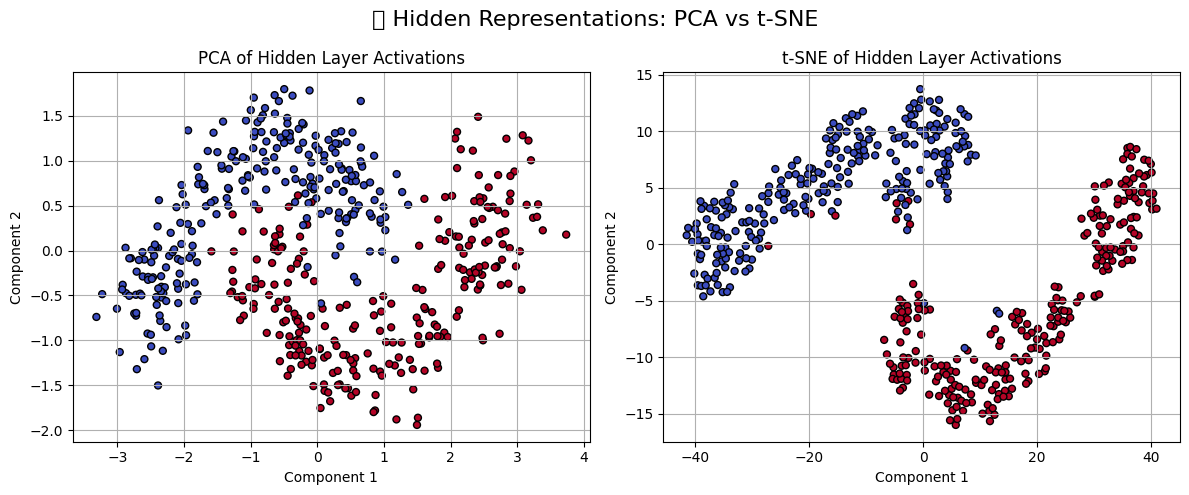

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.datasets import make_moons
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# ==== Toy dataset ====
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# ==== Simple NN with access to hidden ====
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x, return_hidden=False):
        h = F.relu(self.fc1(x))
        out = self.fc2(h)
        if return_hidden:
            return h.detach().numpy()
        return out

# ==== Train the model ====
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

for epoch in range(100):
    logits = model(X)
    loss = loss_fn(logits, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# ==== Get hidden layer outputs ====
with torch.no_grad():
    hidden_activations = model(X, return_hidden=True)  # shape: (N, 16)

# ==== Project to 2D ====
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=30, init='pca', random_state=42)

pca_proj = pca.fit_transform(hidden_activations)
tsne_proj = tsne.fit_transform(hidden_activations)

# ==== Plot ====
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, (proj, title) in enumerate(zip([pca_proj, tsne_proj], ["PCA", "t-SNE"])):
    axs[i].scatter(proj[:, 0], proj[:, 1], c=y, cmap='coolwarm', s=25, edgecolor='k')
    axs[i].set_title(f"{title} of Hidden Layer Activations")
    axs[i].set_xlabel("Component 1")
    axs[i].set_ylabel("Component 2")
    axs[i].grid(True)

plt.suptitle("🎨 Hidden Representations: PCA vs t-SNE", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_134556/1324140829.py:72: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_134556/1324140829.py:72: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_134556/1324140829.py:72: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarni

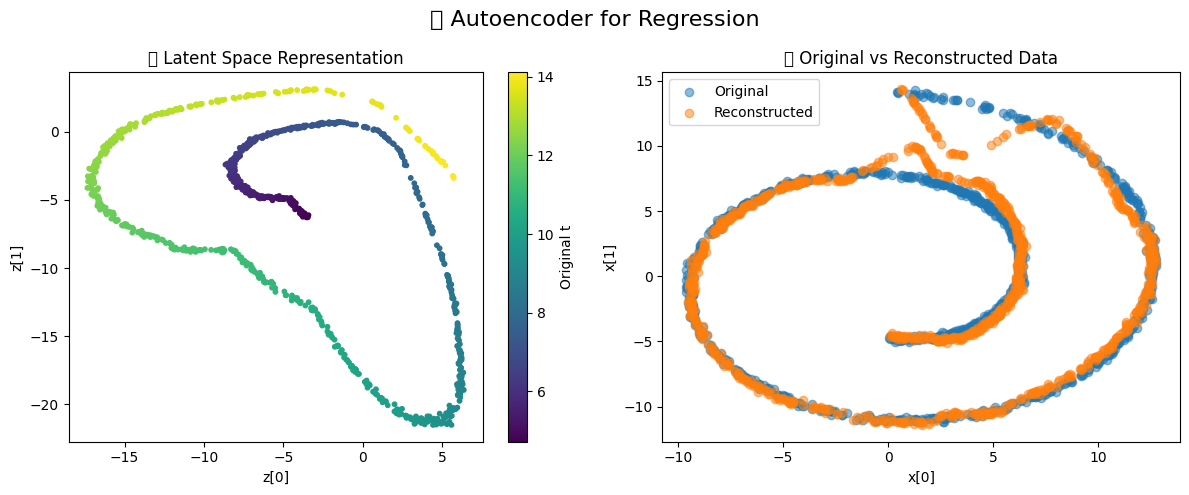

In [ ]:
from sklearn.datasets import make_swiss_roll
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Swiss roll — 3D nonlinear structure with continuous label
X, t = make_swiss_roll(n_samples=1000, noise=0.1)
X = X[:, [0, 2]]  # take x and z only
X = torch.tensor(X, dtype=torch.float32)

class AutoEncoder(nn.Module):
    def __init__(self, latent_dim=2):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(2, 8),
            nn.ReLU(),
            nn.Linear(8, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 8),
            nn.ReLU(),
            nn.Linear(8, 2)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z

model = AutoEncoder(latent_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.MSELoss()

for epoch in range(300):
    out, z = model(X)
    loss = loss_fn(out, X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Get final latent space
with torch.no_grad():
    _, z = model(X)

z = z.numpy()

# Plot latent space colored by original swiss roll "time" t
plt.figure(figsize=(12, 5))

# Latent space
plt.subplot(1, 2, 1)
plt.scatter(z[:, 0], z[:, 1], c=t, cmap='viridis', s=10)
plt.title("🌀 Latent Space Representation")
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.colorbar(label='Original t')

# Reconstruction
X_rec, _ = model(X)
X_rec = X_rec.detach().numpy()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], label='Original', alpha=0.5)
plt.scatter(X_rec[:, 0], X_rec[:, 1], label='Reconstructed', alpha=0.5)
plt.legend()
plt.title("🔁 Original vs Reconstructed Data")
plt.xlabel("x[0]")
plt.ylabel("x[1]")

plt.suptitle("🎓 Autoencoder for Regression", fontsize=16)
plt.tight_layout()
plt.show()


# Residual Connections

/home/seman/solar/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


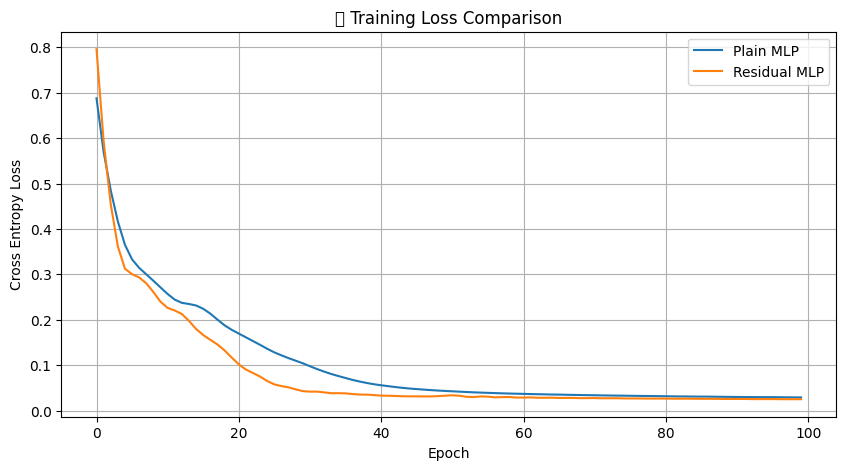

In [ ]:
from sklearn.datasets import make_moons
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Plain MLP
class PlainMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

    def forward(self, x):
        return self.net(x)

# Residual MLP
class ResidualMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 64)
        self.block1 = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64)
        )
        self.out = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        res = self.block1(x)
        x = F.relu(res + x)  # residual connection
        return self.out(x)


def train_model(model, X, y, epochs=100):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    losses = []

    for epoch in range(epochs):
        out = model(X)
        loss = F.cross_entropy(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    
    return losses

model_plain = PlainMLP()
model_resid = ResidualMLP()

loss_plain = train_model(model_plain, X, y)
loss_resid = train_model(model_resid, X, y)

plt.figure(figsize=(10, 5))
plt.plot(loss_plain, label="Plain MLP")
plt.plot(loss_resid, label="Residual MLP")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy Loss")
plt.title("📉 Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()


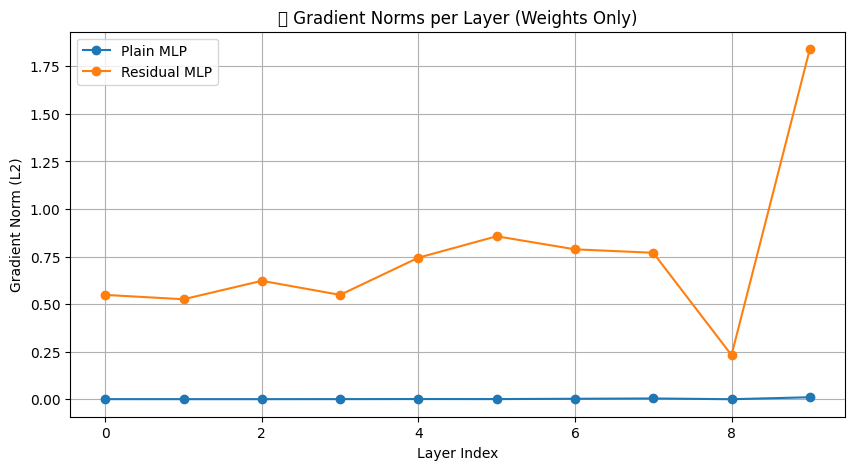

In [ ]:
class DeepMLP(nn.Module):
    def __init__(self, residual=False, depth=8):
        super().__init__()
        self.depth = depth
        self.residual = residual
        self.layers = nn.ModuleList()

        self.input = nn.Linear(2, 64)
        for _ in range(depth):
            self.layers.append(nn.Linear(64, 64))
        self.out = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.input(x))
        for layer in self.layers:
            out = F.relu(layer(x))
            x = out + x if self.residual else out
        return self.out(x)

def compute_gradients(model, X, y):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
    criterion = nn.CrossEntropyLoss()
    optimizer.zero_grad()

    out = model(X)
    loss = criterion(out, y)
    loss.backward()

    grad_norms = []
    for name, param in model.named_parameters():
        if "weight" in name and param.grad is not None:
            grad_norms.append(param.grad.norm().item())
    return grad_norms

X_batch = X[:128]
y_batch = y[:128]

plain_deep = DeepMLP(residual=False)
resid_deep = DeepMLP(residual=True)

plain_grads = compute_gradients(plain_deep, X_batch, y_batch)
resid_grads = compute_gradients(resid_deep, X_batch, y_batch)

plt.figure(figsize=(10, 5))
plt.plot(plain_grads, label="Plain MLP", marker='o')
plt.plot(resid_grads, label="Residual MLP", marker='o')
plt.title("🔁 Gradient Norms per Layer (Weights Only)")
plt.xlabel("Layer Index")
plt.ylabel("Gradient Norm (L2)")
plt.legend()
plt.grid(True)
plt.show()


# Size

Running experiment on moons dataset...


Training models:  10%|█         | 1/10 [00:01<00:09,  1.08s/it]

Early stopping at epoch 175


Training models: 100%|██████████| 10/10 [00:13<00:00,  1.31s/it]


Running experiment on circles dataset...


Training models:  40%|████      | 4/10 [00:02<00:03,  1.69it/s]

Early stopping at epoch 190


Training models:  60%|██████    | 6/10 [00:03<00:02,  1.61it/s]

Early stopping at epoch 178


Training models:  80%|████████  | 8/10 [00:04<00:00,  2.29it/s]

Early stopping at epoch 113
Early stopping at epoch 20


Training models:  90%|█████████ | 9/10 [00:04<00:00,  2.50it/s]

Early stopping at epoch 48


Training models: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]

Early stopping at epoch 181



Training models:  20%|██        | 2/10 [00:00<00:03,  2.24it/s]

Early stopping at epoch 91


Training models: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


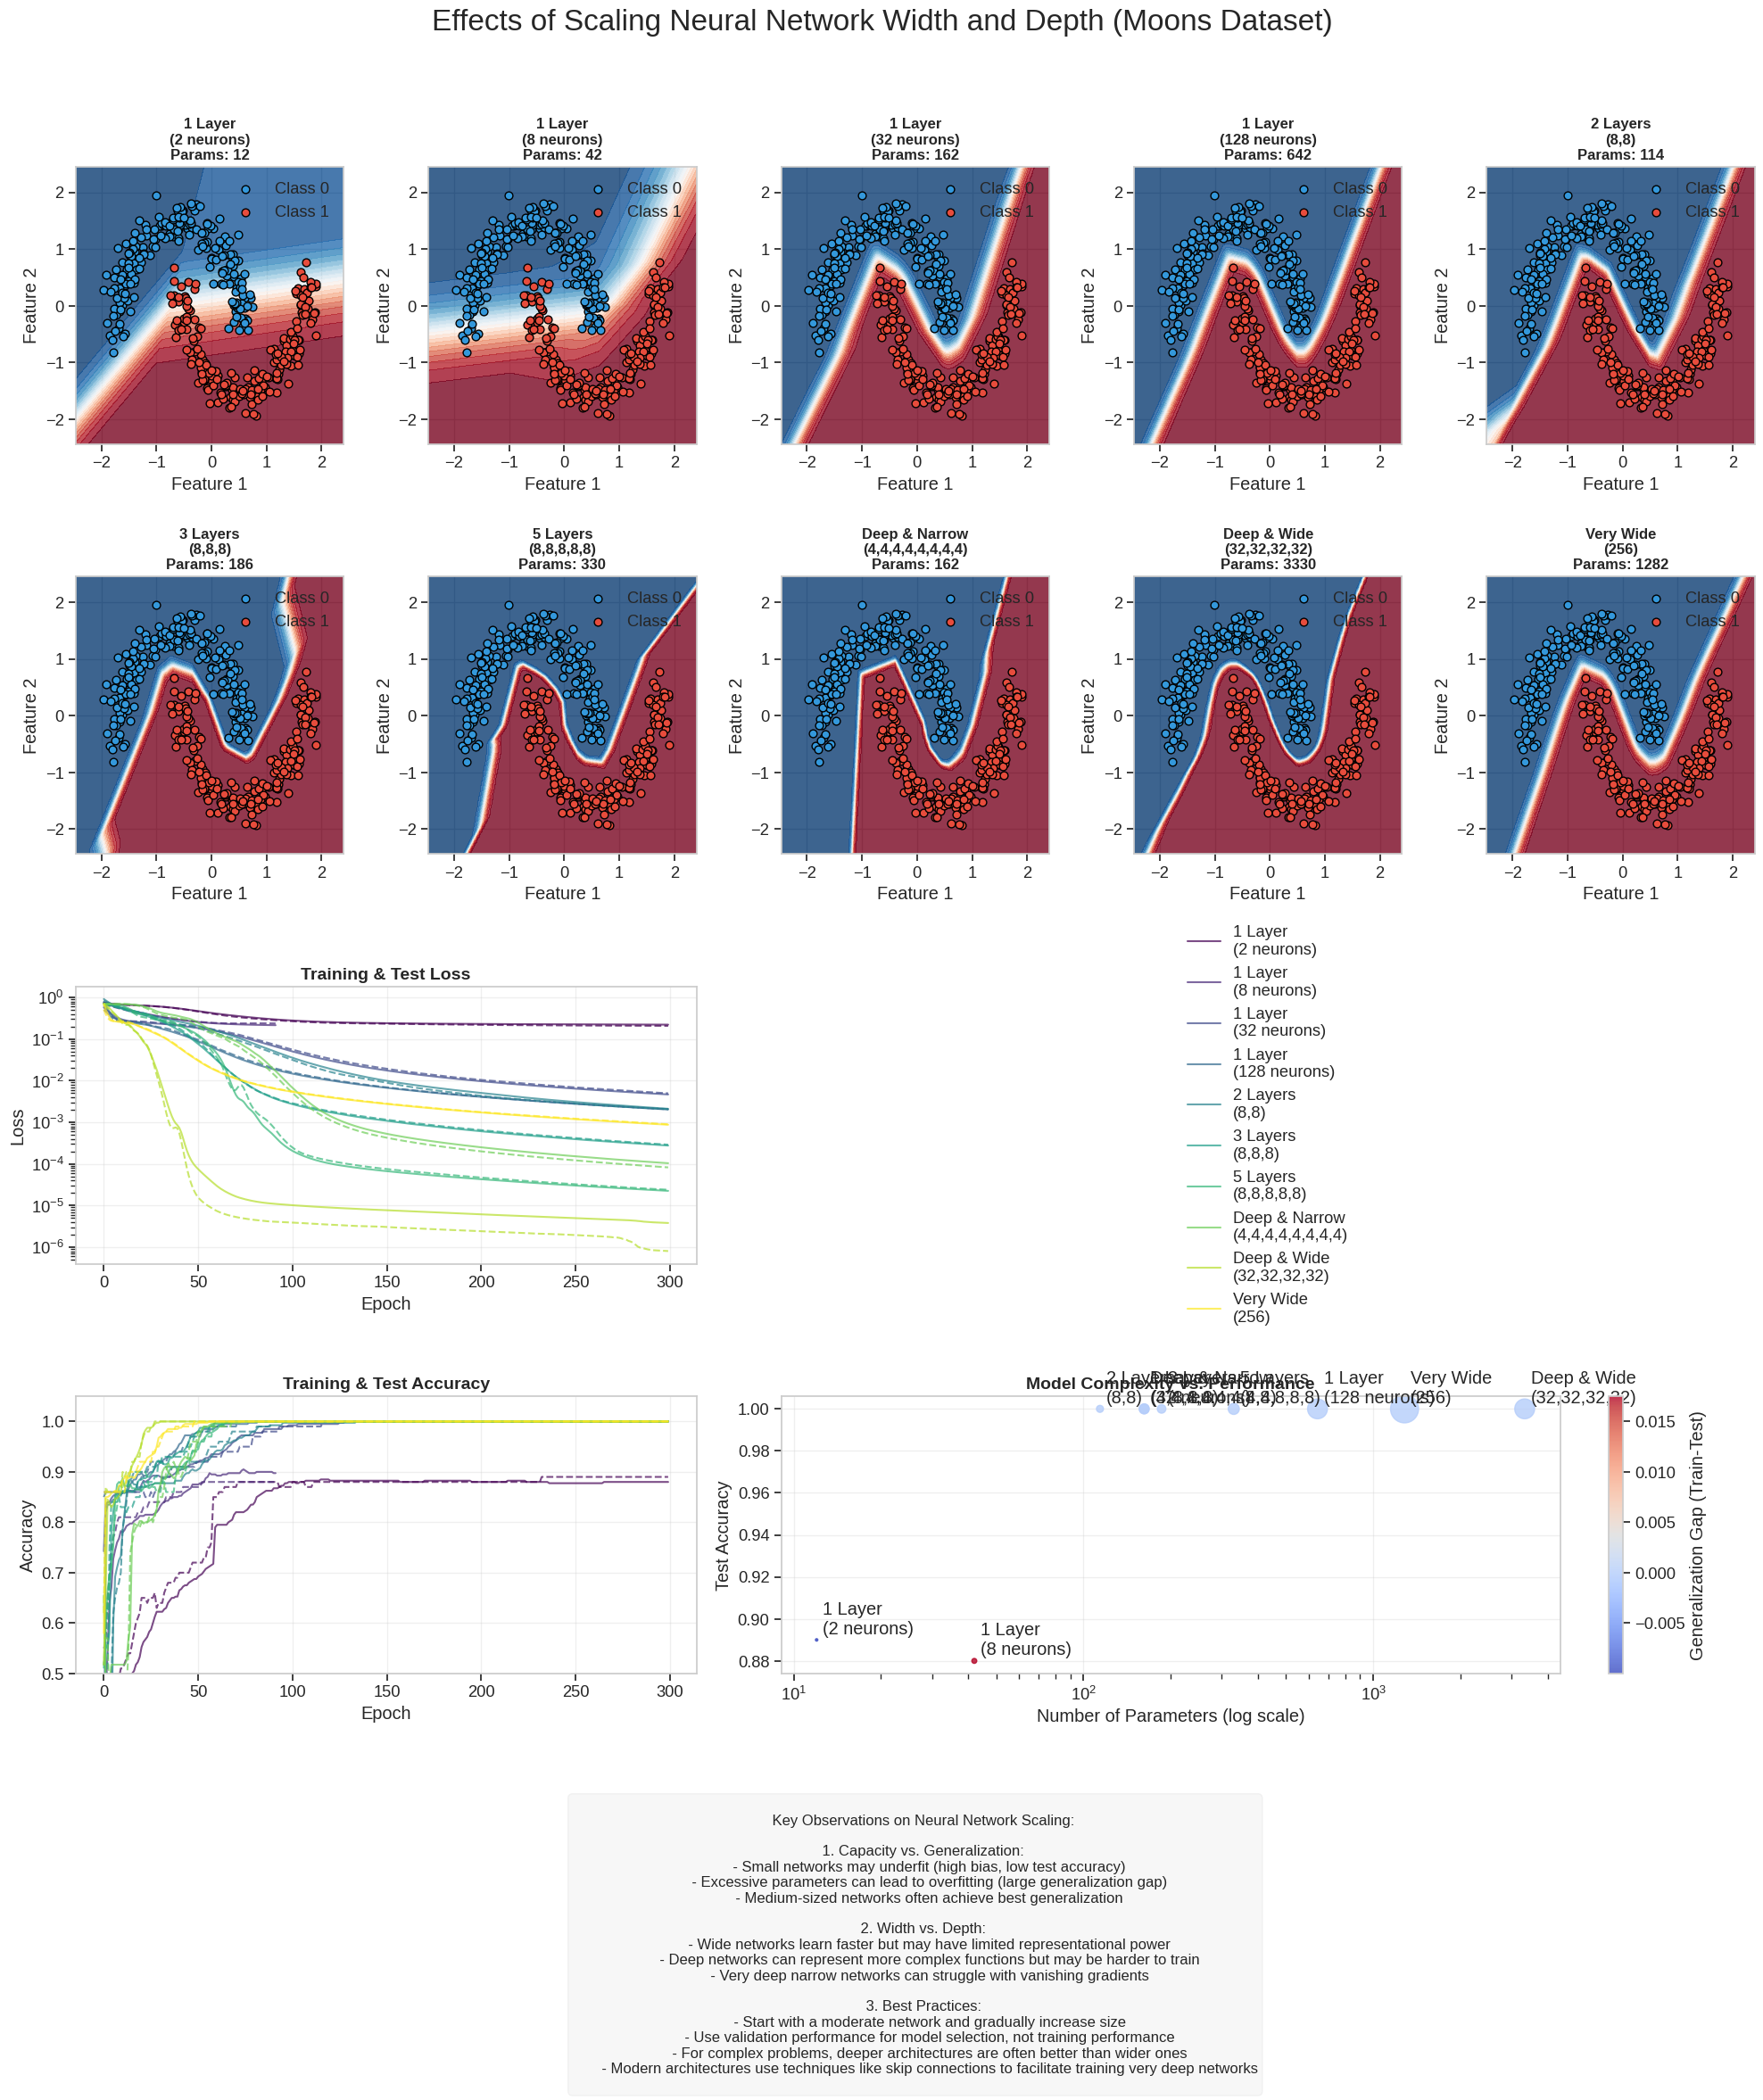

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib.gridspec import GridSpec
import time
from tqdm import tqdm

# Set seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Create a custom color palette
colors = plt.cm.viridis(np.linspace(0, 1, 10))

# Create dataset
def generate_dataset(dataset_type='moons', n_samples=500, noise=0.1):
    if dataset_type == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    elif dataset_type == 'circles':
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=42)
    elif dataset_type == 'blobs':
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, 
                                 n_informative=2, n_clusters_per_class=1, random_state=42)
    else:
        raise ValueError(f"Unknown dataset type: {dataset_type}")
    
    # Standardize features
    X = StandardScaler().fit_transform(X)
    
    # Split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    return X_train, X_test, y_train, y_test, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor

# Define flexible MLP architecture
class FlexibleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim=2, activation=F.relu):
        super().__init__()
        
        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.output_dim = output_dim
        self.activation = activation
        
        # Build layers dynamically based on hidden_dims
        layers = []
        prev_dim = input_dim
        
        for dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, dim))
            prev_dim = dim
            
        self.hidden_layers = nn.ModuleList(layers)
        self.output_layer = nn.Linear(prev_dim, output_dim)
        
        # Initialize weights
        self._init_weights()
        
        # For tracking metrics
        self.train_losses = []
        self.test_losses = []
        self.train_accuracies = []
        self.test_accuracies = []
        self.decision_boundaries = []
        self.parameter_count = self.count_parameters()
        
    def _init_weights(self):
        for layer in self.hidden_layers:
            nn.init.xavier_uniform_(layer.weight)
            nn.init.zeros_(layer.bias)
        nn.init.xavier_uniform_(self.output_layer.weight)
        nn.init.zeros_(self.output_layer.bias)
        
    def count_parameters(self):
        return sum(p.numel() for p in self.parameters() if p.requires_grad)
        
    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        x = self.output_layer(x)
        return x
    
    def complexity_score(self):
        """Return a measure of model complexity based on depth and width"""
        depth = len(self.hidden_dims)
        width = max(self.hidden_dims) if self.hidden_dims else 0
        return depth * width

# Training function
def train_model(model, X_train, y_train, X_test, y_test, 
                epochs=200, lr=0.01, track_boundary=True, early_stopping=True, patience=20):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    
    best_test_loss = float('inf')
    patience_counter = 0
    
    # For decision boundary tracking
    if track_boundary:
        x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
        y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                            np.linspace(y_min, y_max, 100))
        grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    for epoch in range(epochs):
        # Training
        model.train()
        logits = model(X_train)
        train_loss = criterion(logits, y_train)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        # Evaluation
        model.eval()
        with torch.no_grad():
            test_logits = model(X_test)
            test_loss = criterion(test_logits, y_test)
            
            # Calculate accuracies
            train_preds = torch.argmax(logits, dim=1)
            train_acc = (train_preds == y_train).float().mean().item()
            
            test_preds = torch.argmax(test_logits, dim=1)
            test_acc = (test_preds == y_test).float().mean().item()
            
            # Store metrics
            model.train_losses.append(train_loss.item())
            model.test_losses.append(test_loss.item())
            model.train_accuracies.append(train_acc)
            model.test_accuracies.append(test_acc)
            
            # Track decision boundary (less frequently to save computation)
            if track_boundary and (epoch % 10 == 0 or epoch == epochs - 1):
                with torch.no_grad():
                    grid_preds = model(grid_points)
                    grid_probs = F.softmax(grid_preds, dim=1)[:, 1].reshape(xx.shape)
                    model.decision_boundaries.append({
                        'epoch': epoch,
                        'xx': xx.copy(),
                        'yy': yy.copy(),
                        'probs': grid_probs.numpy()
                    })
        
        # Early stopping
        if early_stopping:
            if test_loss < best_test_loss:
                best_test_loss = test_loss
                patience_counter = 0
            else:
                patience_counter += 1
                
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
    
    return model

# Function to plot decision boundaries
def plot_decision_boundary(ax, model, X, y, title=None):
    # Create a mesh grid over the feature space
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Convert to PyTorch tensor and make predictions
    grid_points = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    
    with torch.no_grad():
        model.eval()
        logits = model(grid_points)
        probs = F.softmax(logits, dim=1)[:, 1].reshape(xx.shape)
    
    # Plot the decision boundary
    contour = ax.contourf(xx, yy, probs, cmap='RdBu_r', alpha=0.8, levels=20)
    
    # Plot the training points
    for i in range(2):
        idx = y == i
        ax.scatter(X[idx, 0], X[idx, 1], color=['#3498db', '#e74c3c'][i], 
                   edgecolor='k', s=40, label=f'Class {i}')
    
    # Add title and labels
    if title:
        ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(loc='best')
    
    return contour

# Experiment function to train multiple models
def run_network_scaling_experiment(dataset_type='moons', activation=F.relu):
    # Generate dataset
    X_train, X_test, y_train, y_test, X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = generate_dataset(dataset_type)
    
    # Define various network architectures to test
    # Format: (name, hidden_layers)
    architectures = [
        ("1 Layer\n(2 neurons)", [2]),
        ("1 Layer\n(8 neurons)", [8]),
        ("1 Layer\n(32 neurons)", [32]),
        ("1 Layer\n(128 neurons)", [128]),
        ("2 Layers\n(8,8)", [8, 8]),
        ("3 Layers\n(8,8,8)", [8, 8, 8]),
        ("5 Layers\n(8,8,8,8,8)", [8, 8, 8, 8, 8]),
        ("Deep & Narrow\n(4,4,4,4,4,4,4,4)", [4, 4, 4, 4, 4, 4, 4, 4]),
        ("Deep & Wide\n(32,32,32,32)", [32, 32, 32, 32]),
        ("Very Wide\n(256)", [256])
    ]
    
    # Train models with different architectures
    models = {}
    
    for name, hidden_dims in tqdm(architectures, desc="Training models"):
        # Create model
        model = FlexibleMLP(input_dim=2, hidden_dims=hidden_dims, output_dim=2, activation=activation)
        
        # Train model
        train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, 
                    epochs=300, lr=0.01, early_stopping=True)
        
        # Store model
        models[name] = model
    
    return models, X_train, y_train, X_test, y_test

# Plot the results
def plot_network_scaling_results(models, X_train, y_train, X_test, y_test, dataset_type):
    # Create figure
    fig = plt.figure(figsize=(20, 24))
    gs = GridSpec(5, 5, figure=fig)
    
    # Plot decision boundaries for each model
    col, row = 0, 0
    axs_boundaries = []
    
    for idx, (name, model) in enumerate(models.items()):
        ax = fig.add_subplot(gs[row, col])
        axs_boundaries.append(ax)
        
        # Plot decision boundary
        contour = plot_decision_boundary(ax, model, X_train, y_train,
                                        f"{name}\nParams: {model.parameter_count}")
        
        # Update position
        col += 1
        if col > 4:  # 5 columns per row
            col = 0
            row += 1
    
    # Plot 1: Train vs Test Loss
    ax_loss = fig.add_subplot(gs[2, :2])
    for i, (name, model) in enumerate(models.items()):
        line = ax_loss.plot(model.train_losses, label=f"{name} - Train", color=colors[i], linestyle='-', alpha=0.7)
        ax_loss.plot(model.test_losses, label=f"{name} - Test", color=line[0].get_color(), linestyle='--', alpha=0.7)
    
    ax_loss.set_title("Training & Test Loss", fontsize=14, fontweight='bold')
    ax_loss.set_xlabel("Epoch")
    ax_loss.set_ylabel("Loss")
    ax_loss.set_yscale('log')
    ax_loss.grid(True, alpha=0.3)
    
    # Simplified legend (only show model names once)
    simplified_legends = []
    for name in models.keys():
        simplified_legends.append(name)
    
    ax_loss_legend = fig.add_subplot(gs[2, 2:])
    ax_loss_legend.axis('off')
    
    legend_handles, legend_labels = ax_loss.get_legend_handles_labels()
    legend_items = []
    for name in simplified_legends:
        for i, label in enumerate(legend_labels):
            if name in label:
                legend_items.append((legend_handles[i], name))
                break
    
    ax_loss_legend.legend(*zip(*legend_items), loc='center')
    
    # Plot 2: Train vs Test Accuracy
    ax_acc = fig.add_subplot(gs[3, :2])
    for i, (name, model) in enumerate(models.items()):
        line = ax_acc.plot(model.train_accuracies, label=f"{name} - Train", color=colors[i], linestyle='-', alpha=0.7)
        ax_acc.plot(model.test_accuracies, label=f"{name} - Test", color=line[0].get_color(), linestyle='--', alpha=0.7)
    
    ax_acc.set_title("Training & Test Accuracy", fontsize=14, fontweight='bold')
    ax_acc.set_xlabel("Epoch")
    ax_acc.set_ylabel("Accuracy")
    ax_acc.set_ylim([0.5, 1.05])
    ax_acc.grid(True, alpha=0.3)
    
    # Plot 3: Complexity vs Performance
    ax_complex = fig.add_subplot(gs[3, 2:])
    
    # Extract data for plotting
    names = list(models.keys())
    param_counts = [model.parameter_count for model in models.values()]
    final_train_accs = [model.train_accuracies[-1] for model in models.values()]
    final_test_accs = [model.test_accuracies[-1] for model in models.values()]
    
    # Define model complexity (by depth * width)
    complexities = [model.complexity_score() for model in models.values()]
    
    # Calculate gaps between train and test (potential overfitting indicator)
    generalization_gaps = [train_acc - test_acc for train_acc, test_acc in zip(final_train_accs, final_test_accs)]
    
    # Create scatter plot of complexity vs. performance
    scatter = ax_complex.scatter(param_counts, final_test_accs, 
                              s=[c*2 for c in complexities], # size by complexity
                              c=generalization_gaps, # color by generalization gap
                              cmap='coolwarm', alpha=0.8)
    
    # Add labels
    for i, name in enumerate(names):
        ax_complex.annotate(name, (param_counts[i], final_test_accs[i]),
                       xytext=(5, 5), textcoords='offset points')
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax_complex)
    cbar.set_label('Generalization Gap (Train-Test)')
    
    ax_complex.set_title("Model Complexity vs. Performance", fontsize=14, fontweight='bold')
    ax_complex.set_xlabel("Number of Parameters (log scale)")
    ax_complex.set_ylabel("Test Accuracy")
    ax_complex.set_xscale('log')
    ax_complex.grid(True, alpha=0.3)
    
    # Interpretation plot
    ax_interpret = fig.add_subplot(gs[4, :])
    ax_interpret.axis('off')
    
    # Create summary text for interpretation
    summary_text = """
    Key Observations on Neural Network Scaling:
    
    1. Capacity vs. Generalization:
       - Small networks may underfit (high bias, low test accuracy)
       - Excessive parameters can lead to overfitting (large generalization gap)
       - Medium-sized networks often achieve best generalization
    
    2. Width vs. Depth:
       - Wide networks learn faster but may have limited representational power
       - Deep networks can represent more complex functions but may be harder to train
       - Very deep narrow networks can struggle with vanishing gradients
    
    3. Best Practices:
       - Start with a moderate network and gradually increase size
       - Use validation performance for model selection, not training performance
       - For complex problems, deeper architectures are often better than wider ones
       - Modern architectures use techniques like skip connections to facilitate training very deep networks
    """
    
    ax_interpret.text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center',
                 bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.8))
    
    # Add title
    fig.suptitle(f"Effects of Scaling Neural Network Width and Depth ({dataset_type.capitalize()} Dataset)", 
                 fontsize=24, y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    return fig

# Run the experiment for different datasets
for dataset_type in ['moons', 'circles']:
    print(f"Running experiment on {dataset_type} dataset...")
    models, X_train, y_train, X_test, y_test = run_network_scaling_experiment(dataset_type)
    fig = plot_network_scaling_results(models, X_train, y_train, X_test, y_test, dataset_type)
    plt.savefig(f"network_scaling_{dataset_type}.png", dpi=300, bbox_inches='tight')
    plt.close(fig)

# Show one of the figures (moons dataset)
models, X_train, y_train, X_test, y_test = run_network_scaling_experiment('moons')
fig = plot_network_scaling_results(models, X_train, y_train, X_test, y_test, 'moons')
plt.show()